# Zadanie 19.2

##### Na podstawie wykorzystanych danych wytrenuj nowe modele z dodatkowymi warstwami (dodaj kolejne warstwy splotowe). Dla nowych sieci przetestuj ponownie wykorzystane techniki regularyzacji.

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation, GlobalAveragePooling2D
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2

In [3]:
# Ustawienia
train_data_dir = 'dataset/train'
valid_data_dir = 'dataset/valid'
test_data_dir  = 'dataset/test'
img_width, img_height = 150, 150
batch_size = 64

In [4]:
# Generatory
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

Found 17500 images belonging to 2 classes.
Found 4998 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


##### Stworzenie modeli bazowych

In [4]:
base5 = Sequential()
# Block 1
base5.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(150, 150, 3)))
base5.add(MaxPooling2D(pool_size=(2, 2)))
# Block 2
base5.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
base5.add(MaxPooling2D(pool_size=(2, 2)))
# Block 3
base5.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
base5.add(MaxPooling2D(pool_size=(2, 2)))
# Block 4
base5.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
base5.add(MaxPooling2D(pool_size=(2, 2)))
# Block 5
base5.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
base5.add(MaxPooling2D(pool_size=(2, 2)))

base5.add(Flatten())
base5.add(Dense(128, activation='relu'))
base5.add(Dense(1, activation='sigmoid'))

base5.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
base5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0

In [5]:
base6 = Sequential()
# Block 1
base6.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(150, 150, 3)))
base6.add(MaxPooling2D(pool_size=(2, 2)))
# Block 2
base6.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
base6.add(MaxPooling2D(pool_size=(2, 2)))
# Block 3
base6.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
base6.add(MaxPooling2D(pool_size=(2, 2)))
# Block 4
base6.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
base6.add(MaxPooling2D(pool_size=(2, 2)))
# Block 5
base6.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
base6.add(MaxPooling2D(pool_size=(2, 2)))
# Block 6
base6.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
base6.add(MaxPooling2D(pool_size=(2, 2)))

base6.add(Flatten())
base6.add(Dense(128, activation='relu'))
base6.add(Dense(1, activation='sigmoid'))

base6.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
base6.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 75, 75, 16)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 18, 18, 64)      

In [6]:
base7 = Sequential()
# Block 1
base7.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(150, 150, 3)))
base7.add(MaxPooling2D(pool_size=(2, 2)))
# Block 2
base7.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
base7.add(MaxPooling2D(pool_size=(2, 2)))
# Block 3
base7.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
base7.add(MaxPooling2D(pool_size=(2, 2)))
# Block 4
base7.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
base7.add(MaxPooling2D(pool_size=(2, 2)))
# Block 5
base7.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
base7.add(MaxPooling2D(pool_size=(2, 2)))
# Block 6
base7.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
base7.add(MaxPooling2D(pool_size=(2, 2)))
# Block 7
base7.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
base7.add(MaxPooling2D(pool_size=(2, 2)))

base7.add(Flatten())
base7.add(Dense(128, activation='relu'))
base7.add(Dense(1, activation='sigmoid'))

base7.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
base7.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 75, 75, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 18, 18, 64)      

##### Stworzenie funkcji do uczenia, zachowania i wizualizacji postępów modeli

In [5]:
models = []
if not os.path.exists("history_567"):
    os.mkdir("history_567")
if not os.path.exists("charts_567"):
    os.mkdir("charts_567")

In [6]:
def fit_and_save_model(model, train_set=train_generator, epochs=100, callbacks=None, model_name='model'):
    history = model.fit(train_set,
                        epochs=epochs,
                        validation_data=valid_generator,
                        callbacks=callbacks)
    history_df = pd.DataFrame(history.history)
    history_csv_file = f'history_567/{model_name}.csv'
    with open(history_csv_file, mode='w') as f:
        history_df.to_csv(f)
    models.append((model, model_name))
    print(f'Model {model_name} saved')

In [7]:
def plot_individual_histories(models, history_folder='history_567', charts_folder='charts_567'):
    os.makedirs(charts_folder, exist_ok=True)
    
    for model, model_name in models:
        df = pd.read_csv(f'{history_folder}/{model_name}.csv', index_col=0)
        df.index += 1
        fig = plt.figure(figsize=(16, 12))
        
        # Wykres Accuracy
        ax1 = fig.add_subplot(211)
        ax1.plot(df['accuracy'], "bp--", label='Training')
        ax1.plot(df['val_accuracy'], "rp--", label='Validation')
        ax1.set_title(f'Model {model_name} Accuracy', fontsize=20)
        ax1.set_ylabel('Accuracy', fontsize=15)
        ax1.set_xlabel('Epoch', fontsize=15)
        ax1.set_xlim([1, max(df.index)])
        min_acc = min(df[['accuracy', 'val_accuracy']].min())
        ax1.set_ylim([min_acc, 1])
        for milestone in (0.7, 0.8, 0.9, 0.95):
            ax1.axhline(milestone, color="k", linestyle="--")
            try:
                if min(df[df['val_accuracy'] >= milestone].index) > 1:
                    ax1.axvline(min(df[df['val_accuracy'] >= milestone].index), color="g", linestyle="--")
                    ax1.text(min(df[df['val_accuracy'] >= milestone].index) + 0.6, min_acc + 0.02,
                             f'Epoch: {min(df[df["val_accuracy"] >= milestone].index)}', rotation=90)
            except Exception:
                pass
        ax1.legend(loc='lower right')
        
        # Wykres Loss
        ax2 = fig.add_subplot(212)
        ax2.plot(df['loss'], "bp--", label='Training')
        ax2.plot(df['val_loss'], "rp--", label='Validation')
        ax2.set_title(f'Model {model_name} Loss', fontsize=20)
        ax2.set_ylabel('Loss', fontsize=15)
        ax2.set_xlabel('Epoch', fontsize=15)
        ax2.set_xlim([1, max(df.index)])
        max_loss = max(df[['loss', 'val_loss']].max())
        ax2.set_ylim([0, max_loss])
        ax2.legend(loc='upper right')
        
        plt.tight_layout()
        plt.savefig(f'{charts_folder}/{model_name}.png', transparent=True, dpi=600)
        plt.show()

In [8]:
def plot_combined_histories(models, history_folder='history_567', charts_folder='charts_567', name='all'):
    os.makedirs(charts_folder, exist_ok=True)
    
    global_max_index = 0
    global_min_accuracy = 1
    global_max_loss = 0
    
    for model, model_name in models:
        df = pd.read_csv(f'{history_folder}/{model_name}.csv', index_col=0)
        df.index += 1
        global_max_index = max(global_max_index, max(df.index))
        global_min_accuracy = min(global_min_accuracy, df[['accuracy','val_accuracy']].min().min())
        global_max_loss = max(global_max_loss, df[['loss','val_loss']].max().max())
    
    colors = plt.cm.rainbow(np.linspace(0, 1, len(models)))
    fig = plt.figure(figsize=(16, 12))
    
    # Wykres dokładności
    ax1 = fig.add_subplot(211)
    for (model, model_name), color in zip(models, colors):
        df = pd.read_csv(f'{history_folder}/{model_name}.csv', index_col=0)
        df.index += 1
        ax1.plot(df['val_accuracy'], label=f'Model {model_name}', color=color, linewidth=3)
        ax1.axhline(df['val_accuracy'].max(), color=color, linestyle="dotted", linewidth=4)
    ax1.set_title('Combined Accuracy', fontsize=20)
    ax1.set_ylabel('Accuracy', fontsize=15)
    ax1.set_xlabel('Epoch', fontsize=15)
    ax1.set_xlim([1, global_max_index])
    ax1.set_ylim([global_min_accuracy, 1])
    for milestone in (0.7, 0.8, 0.9, 0.95):
        ax1.axhline(milestone, color="k", linestyle="--")
    ax1.legend(loc='lower right')
    
    # Wykres strat
    ax2 = fig.add_subplot(212)
    for (model, model_name), color in zip(models, colors):
        df = pd.read_csv(f'{history_folder}/{model_name}.csv', index_col=0)
        df.index += 1
        ax2.plot(df['val_loss'], label=f'Model {model_name}', color=color, linewidth=3)
        ax2.axhline(df['val_loss'].min(), color=color, linestyle="dotted", linewidth=4)
    ax2.set_title('Combined Loss', fontsize=20)
    ax2.set_ylabel('Loss', fontsize=15)
    ax2.set_xlabel('Epoch', fontsize=15)
    ax2.set_xlim([1, global_max_index])
    ax2.set_ylim([0, global_max_loss])
    ax2.legend(loc='upper right')
    
    plt.tight_layout()
    plt.savefig(f'{charts_folder}/train_history_of_{name}_models.png', transparent=True, dpi=600)
    plt.show()

##### Nauka i wizualizacje dla modeli bazowych

In [9]:
fit_and_save_model(base5, model_name='base_5')

Epoch 1/100
 93/274 [=========>....................] - ETA: 20s - loss: 0.6991 - accuracy: 0.5299

c:\Users\Urban\.conda\envs\kodilla-edu\lib\site-packages\PIL\TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))


274/274 [==============================] - 55s 149ms/step - loss: 0.6636 - accuracy: 0.5961 - val_loss: 0.6452 - val_accuracy: 0.6327
Epoch 2/100
274/274 [==============================] - 31s 113ms/step - loss: 0.5515 - accuracy: 0.7201 - val_loss: 0.5139 - val_accuracy: 0.7489
Epoch 3/100
274/274 [==============================] - 31s 113ms/step - loss: 0.4563 - accuracy: 0.7869 - val_loss: 0.3905 - val_accuracy: 0.8197
Epoch 4/100
274/274 [==============================] - 31s 112ms/step - loss: 0.3819 - accuracy: 0.8245 - val_loss: 0.3520 - val_accuracy: 0.8409
Epoch 5/100
274/274 [==============================] - 31s 112ms/step - loss: 0.3224 - accuracy: 0.8590 - val_loss: 0.3080 - val_accuracy: 0.8601
Epoch 6/100
274/274 [==============================] - 31s 112ms/step - loss: 0.2729 - accuracy: 0.8849 - val_loss: 0.3169 - val_accuracy: 0.8691
Epoch 7/100
274/274 [==============================] - 31s 112ms/step - loss: 0.2229 - accuracy: 0.9043 - val_loss: 0.3005 - val_accurac

In [10]:
fit_and_save_model(base6, model_name='base_6')

Epoch 1/100
274/274 [==============================] - 32s 112ms/step - loss: 0.7064 - accuracy: 0.5533 - val_loss: 0.6772 - val_accuracy: 0.5548
Epoch 2/100
274/274 [==============================] - 31s 111ms/step - loss: 0.6047 - accuracy: 0.6779 - val_loss: 0.5623 - val_accuracy: 0.7237
Epoch 3/100
274/274 [==============================] - 31s 113ms/step - loss: 0.4959 - accuracy: 0.7604 - val_loss: 0.4266 - val_accuracy: 0.8085
Epoch 4/100
274/274 [==============================] - 31s 111ms/step - loss: 0.4178 - accuracy: 0.8107 - val_loss: 0.3900 - val_accuracy: 0.8215
Epoch 5/100
274/274 [==============================] - 31s 112ms/step - loss: 0.3569 - accuracy: 0.8458 - val_loss: 0.3316 - val_accuracy: 0.8549
Epoch 6/100
274/274 [==============================] - 30s 111ms/step - loss: 0.2901 - accuracy: 0.8753 - val_loss: 0.3036 - val_accuracy: 0.8752
Epoch 7/100
274/274 [==============================] - 30s 110ms/step - loss: 0.2429 - accuracy: 0.8991 - val_loss: 0.3344 -

In [11]:
fit_and_save_model(base7, model_name='base_7')

Epoch 1/100
274/274 [==============================] - 36s 125ms/step - loss: 0.6929 - accuracy: 0.5803 - val_loss: 0.6368 - val_accuracy: 0.6142
Epoch 2/100
274/274 [==============================] - 31s 115ms/step - loss: 0.5920 - accuracy: 0.6867 - val_loss: 0.5378 - val_accuracy: 0.7359
Epoch 3/100
274/274 [==============================] - 40s 146ms/step - loss: 0.4904 - accuracy: 0.7658 - val_loss: 0.4611 - val_accuracy: 0.7809
Epoch 4/100
274/274 [==============================] - 40s 145ms/step - loss: 0.4035 - accuracy: 0.8181 - val_loss: 0.3490 - val_accuracy: 0.8439
Epoch 5/100
274/274 [==============================] - 37s 136ms/step - loss: 0.3383 - accuracy: 0.8543 - val_loss: 0.4203 - val_accuracy: 0.8001
Epoch 6/100
274/274 [==============================] - 31s 113ms/step - loss: 0.2832 - accuracy: 0.8806 - val_loss: 0.2783 - val_accuracy: 0.8792
Epoch 7/100
274/274 [==============================] - 32s 116ms/step - loss: 0.2349 - accuracy: 0.9034 - val_loss: 0.3841 -

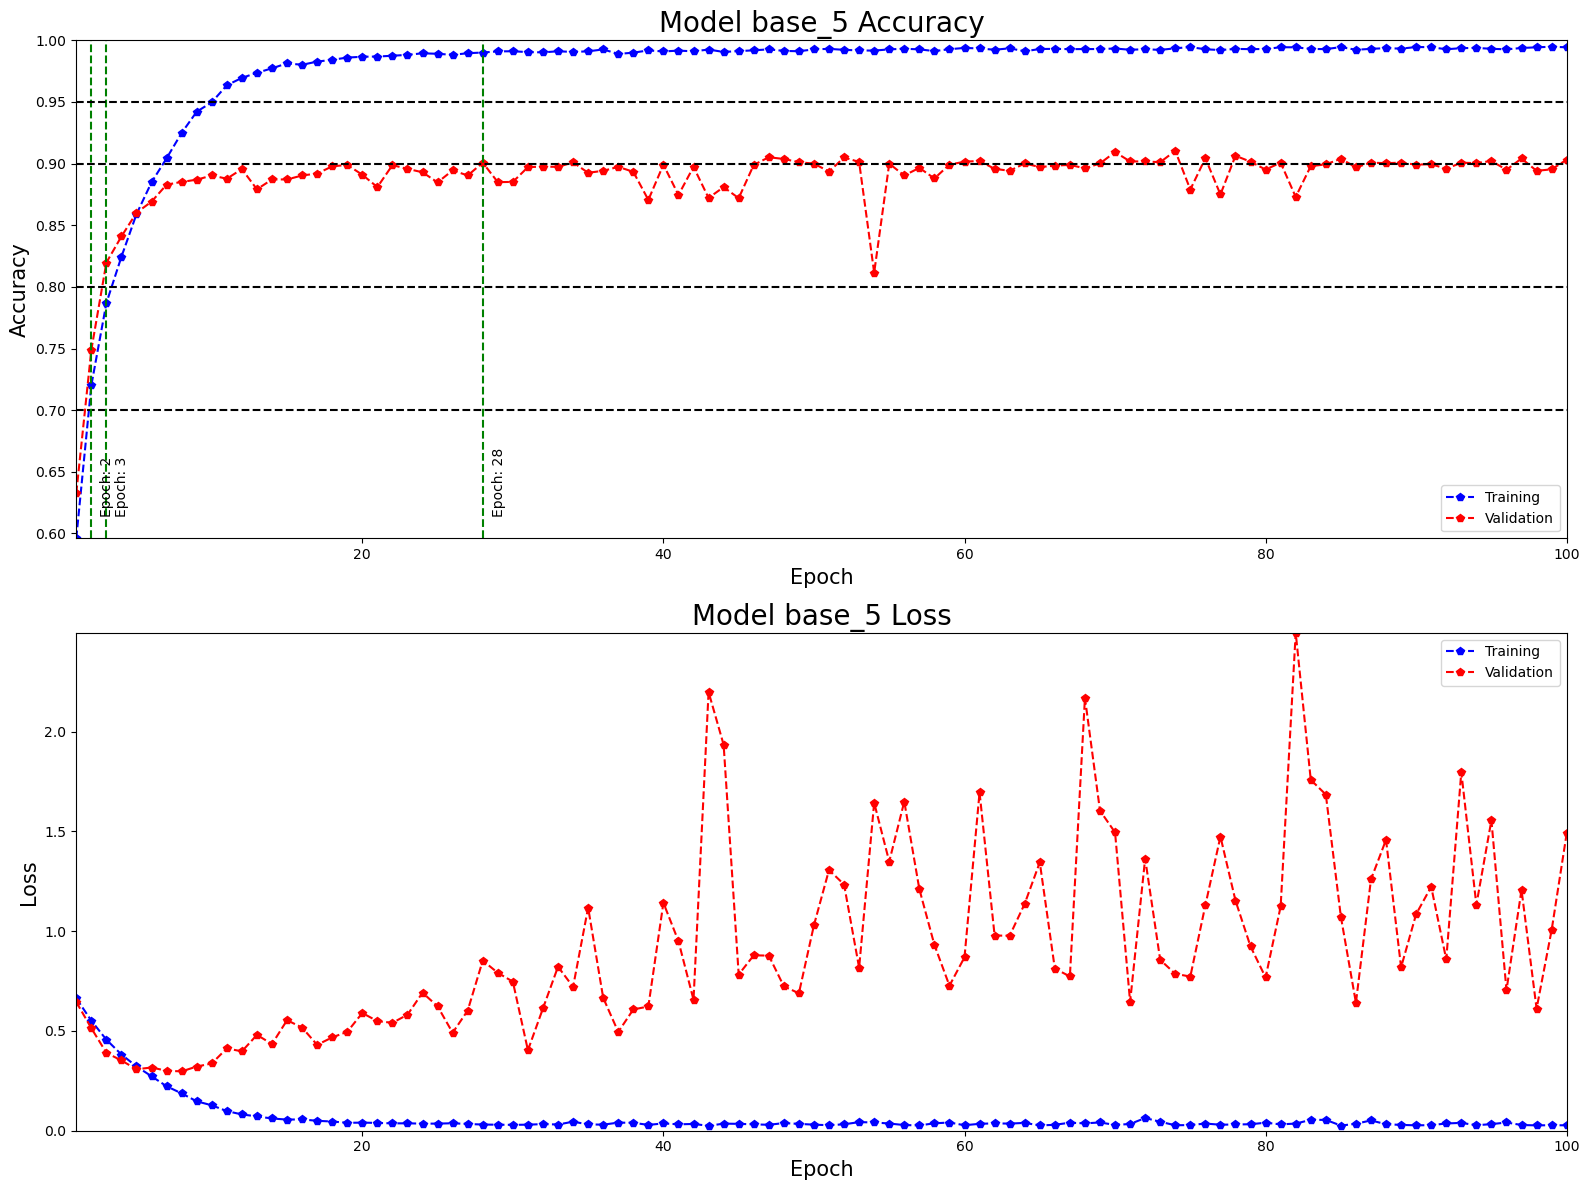

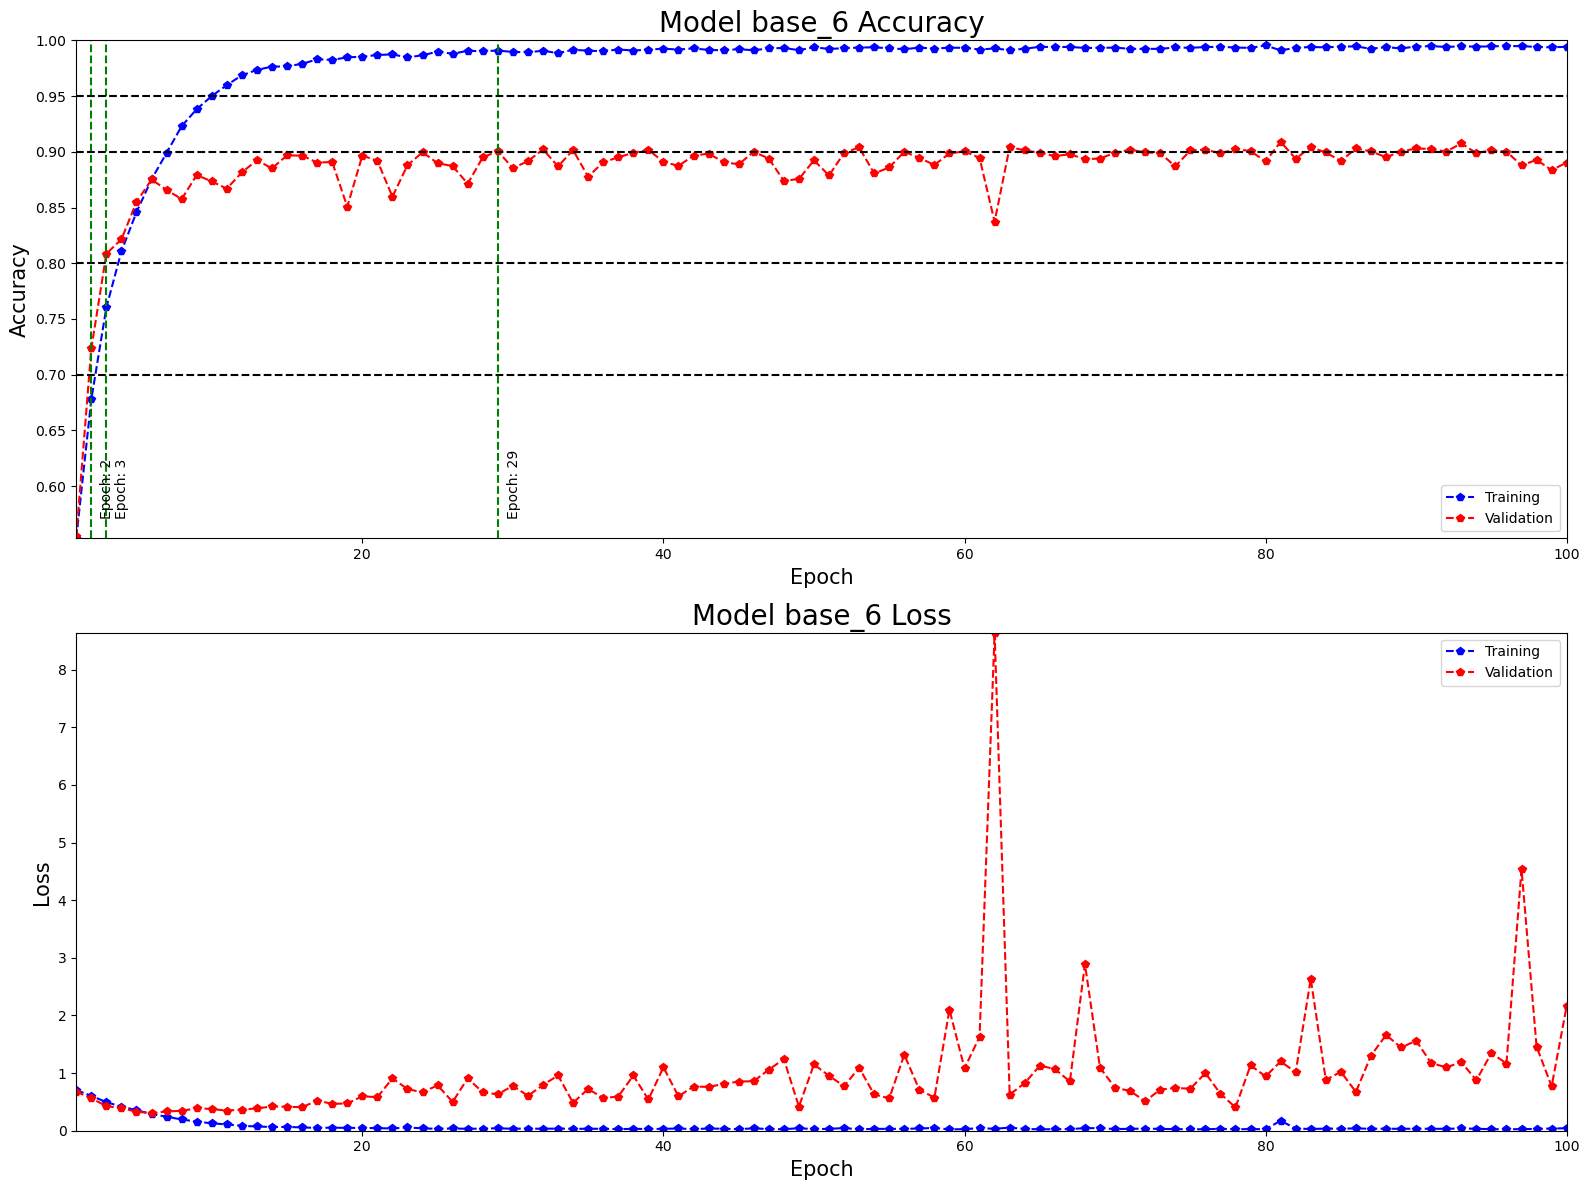

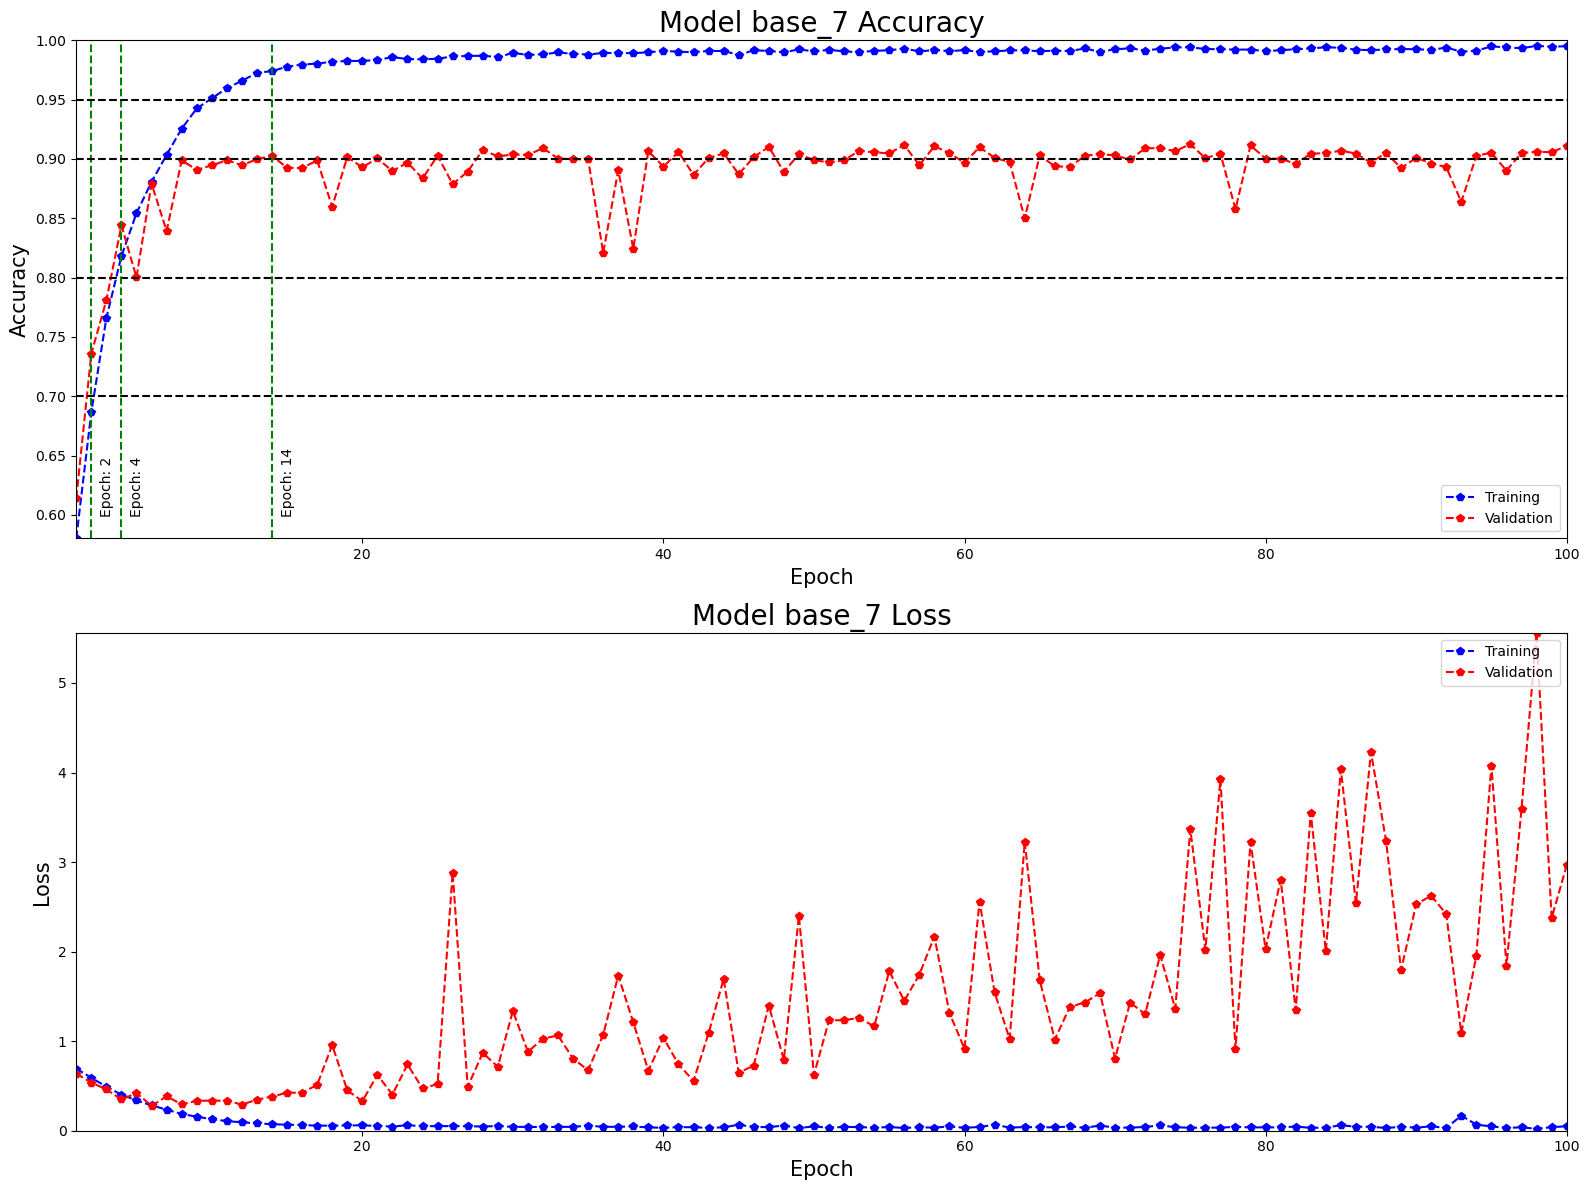

In [28]:
plot_individual_histories(models)

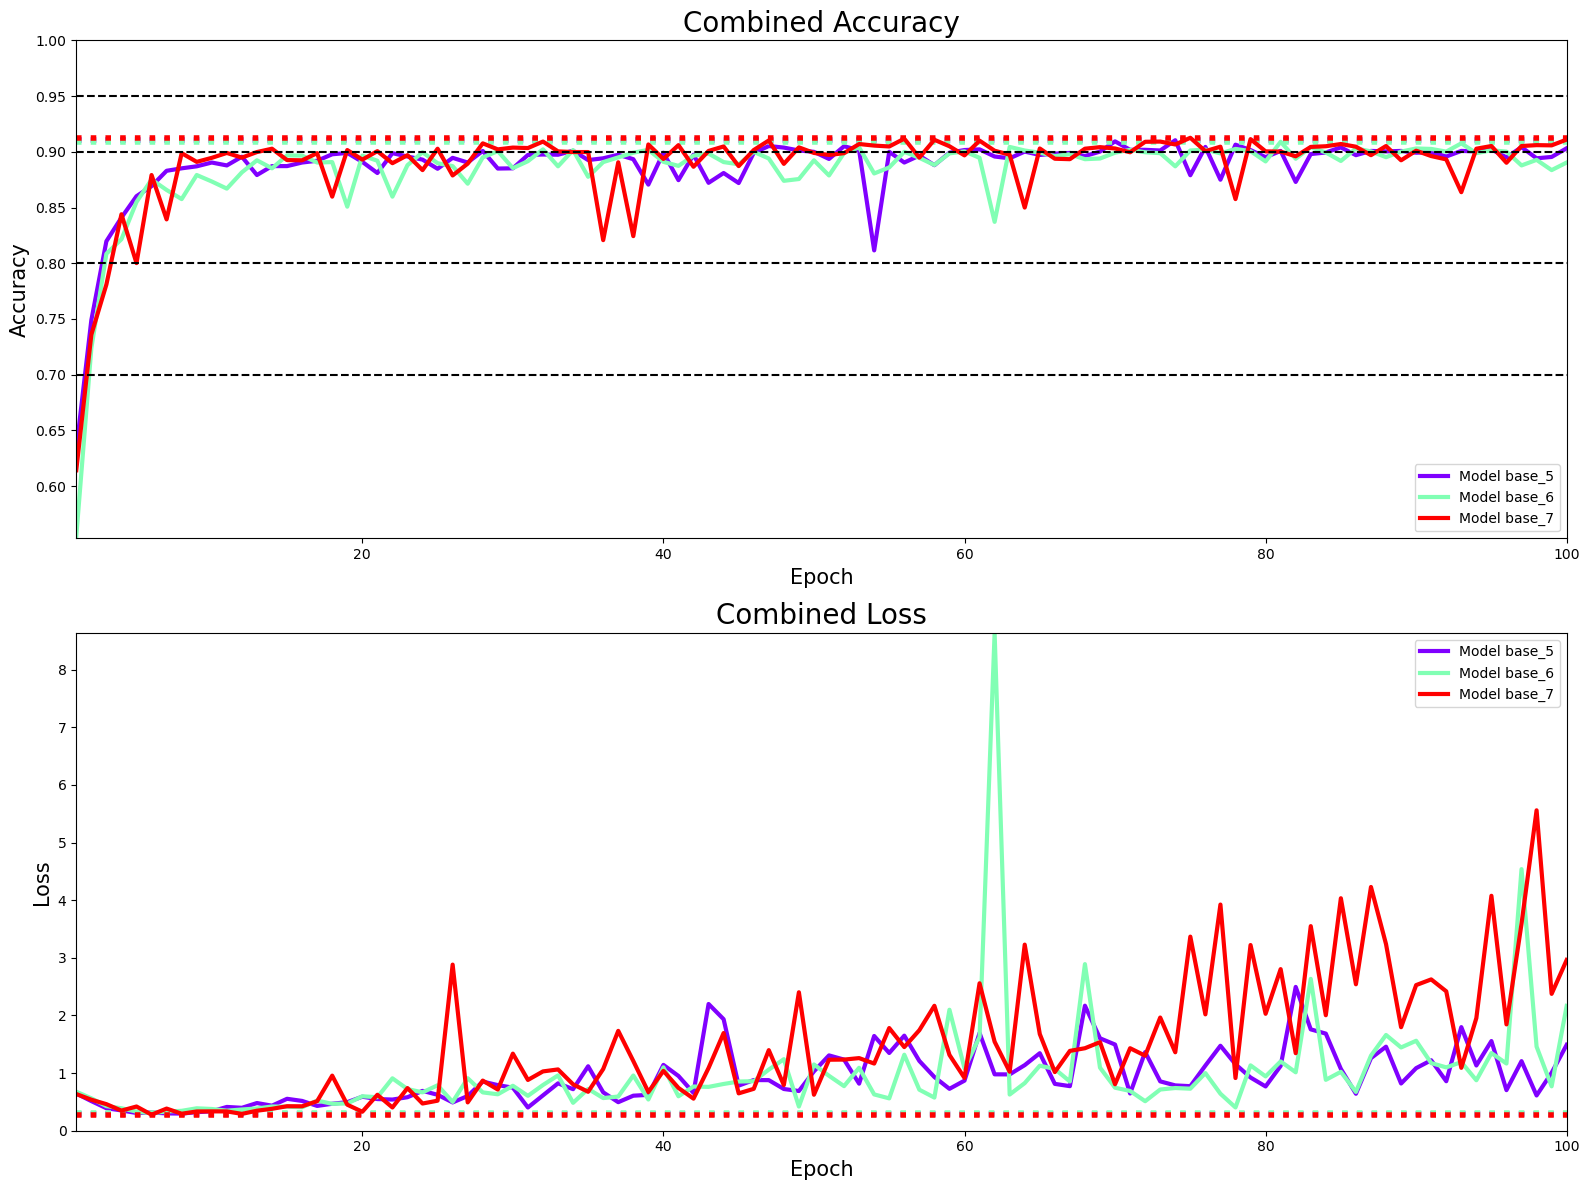

In [30]:
plot_combined_histories(models)

##### Zdefiniowanie callbacków Early Stopping i Learning Rate Scheduling oraz Learning Rate

In [11]:
callbacks = []
lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, min_lr=1e-6)
callbacks.append(lr)
es = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, restore_best_weights=True)
callbacks.append(es)

In [38]:
lres5 = Sequential()
# Block 1
lres5.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(150, 150, 3)))
lres5.add(MaxPooling2D(pool_size=(2, 2)))
# Block 2
lres5.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
lres5.add(MaxPooling2D(pool_size=(2, 2)))
# Block 3
lres5.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
lres5.add(MaxPooling2D(pool_size=(2, 2)))
# Block 4
lres5.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
lres5.add(MaxPooling2D(pool_size=(2, 2)))
# Block 5
lres5.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
lres5.add(MaxPooling2D(pool_size=(2, 2)))

lres5.add(Flatten())
lres5.add(Dense(128, activation='relu'))
lres5.add(Dense(1, activation='sigmoid'))

lres5.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=1e-3), metrics=['accuracy'])
lres5.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 75, 75, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 18, 18, 64)      

In [39]:
lres6 = Sequential()
# Block 1
lres6.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(150, 150, 3)))
lres6.add(MaxPooling2D(pool_size=(2, 2)))
# Block 2
lres6.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
lres6.add(MaxPooling2D(pool_size=(2, 2)))
# Block 3
lres6.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
lres6.add(MaxPooling2D(pool_size=(2, 2)))
# Block 4
lres6.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
lres6.add(MaxPooling2D(pool_size=(2, 2)))
# Block 5
lres6.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
lres6.add(MaxPooling2D(pool_size=(2, 2)))
# Block 6
lres6.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
lres6.add(MaxPooling2D(pool_size=(2, 2)))

lres6.add(Flatten())
lres6.add(Dense(128, activation='relu'))
lres6.add(Dense(1, activation='sigmoid'))

lres6.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=1e-3), metrics=['accuracy'])
lres6.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 75, 75, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 18, 18, 64)      

In [40]:
lres7 = Sequential()
# Block 1
lres7.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(150, 150, 3)))
lres7.add(MaxPooling2D(pool_size=(2, 2)))
# Block 2
lres7.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
lres7.add(MaxPooling2D(pool_size=(2, 2)))
# Block 3
lres7.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
lres7.add(MaxPooling2D(pool_size=(2, 2)))
# Block 4
lres7.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
lres7.add(MaxPooling2D(pool_size=(2, 2)))
# Block 5
lres7.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
lres7.add(MaxPooling2D(pool_size=(2, 2)))
# Block 6
lres7.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
lres7.add(MaxPooling2D(pool_size=(2, 2)))
# Block 7
lres7.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
lres7.add(MaxPooling2D(pool_size=(2, 2)))

lres7.add(Flatten())
lres7.add(Dense(128, activation='relu'))
lres7.add(Dense(1, activation='sigmoid'))

lres7.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=1e-3), metrics=['accuracy'])
lres7.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_47 (Conv2D)          (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, 75, 75, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_48 (Conv2D)          (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 18, 18, 64)      

In [42]:
fit_and_save_model(lres5, epochs=1000, callbacks=callbacks, model_name='lres_5')

Epoch 1/1000
274/274 [==============================] - 32s 112ms/step - loss: 0.6713 - accuracy: 0.6024 - val_loss: 0.6064 - val_accuracy: 0.6717 - lr: 0.0010
Epoch 2/1000
274/274 [==============================] - 31s 113ms/step - loss: 0.5287 - accuracy: 0.7350 - val_loss: 0.5397 - val_accuracy: 0.7279 - lr: 0.0010
Epoch 3/1000
274/274 [==============================] - 34s 122ms/step - loss: 0.4514 - accuracy: 0.7910 - val_loss: 0.4080 - val_accuracy: 0.8135 - lr: 0.0010
Epoch 4/1000
274/274 [==============================] - 29s 106ms/step - loss: 0.3877 - accuracy: 0.8269 - val_loss: 0.3654 - val_accuracy: 0.8419 - lr: 0.0010
Epoch 5/1000
274/274 [==============================] - 29s 106ms/step - loss: 0.3336 - accuracy: 0.8530 - val_loss: 0.3453 - val_accuracy: 0.8597 - lr: 0.0010
Epoch 6/1000
274/274 [==============================] - 29s 107ms/step - loss: 0.2825 - accuracy: 0.8807 - val_loss: 0.2962 - val_accuracy: 0.8822 - lr: 0.0010
Epoch 7/1000
274/274 [==================

In [43]:
fit_and_save_model(lres6, epochs=1000, callbacks=callbacks, model_name='lres_6')

Epoch 1/1000
274/274 [==============================] - 33s 115ms/step - loss: 0.6604 - accuracy: 0.6058 - val_loss: 0.5834 - val_accuracy: 0.6897 - lr: 0.0010
Epoch 2/1000
274/274 [==============================] - 30s 109ms/step - loss: 0.5613 - accuracy: 0.7122 - val_loss: 0.5322 - val_accuracy: 0.7411 - lr: 0.0010
Epoch 3/1000
274/274 [==============================] - 30s 108ms/step - loss: 0.4694 - accuracy: 0.7779 - val_loss: 0.4210 - val_accuracy: 0.8093 - lr: 0.0010
Epoch 4/1000
274/274 [==============================] - 31s 112ms/step - loss: 0.3998 - accuracy: 0.8163 - val_loss: 0.4539 - val_accuracy: 0.7915 - lr: 0.0010
Epoch 5/1000
274/274 [==============================] - 30s 108ms/step - loss: 0.3396 - accuracy: 0.8507 - val_loss: 0.3491 - val_accuracy: 0.8513 - lr: 0.0010
Epoch 6/1000
274/274 [==============================] - 30s 109ms/step - loss: 0.2834 - accuracy: 0.8793 - val_loss: 0.3446 - val_accuracy: 0.8519 - lr: 0.0010
Epoch 7/1000
274/274 [==================

In [44]:
fit_and_save_model(lres7, epochs=1000, callbacks=callbacks, model_name='lres_7')

Epoch 1/1000
274/274 [==============================] - 31s 109ms/step - loss: 0.7017 - accuracy: 0.5262 - val_loss: 0.6795 - val_accuracy: 0.5094 - lr: 0.0010
Epoch 2/1000
274/274 [==============================] - 30s 111ms/step - loss: 0.6294 - accuracy: 0.6543 - val_loss: 0.5383 - val_accuracy: 0.7395 - lr: 0.0010
Epoch 3/1000
274/274 [==============================] - 30s 111ms/step - loss: 0.5150 - accuracy: 0.7511 - val_loss: 0.4426 - val_accuracy: 0.7977 - lr: 0.0010
Epoch 4/1000
274/274 [==============================] - 30s 110ms/step - loss: 0.4316 - accuracy: 0.8037 - val_loss: 0.3826 - val_accuracy: 0.8267 - lr: 0.0010
Epoch 5/1000
274/274 [==============================] - 30s 110ms/step - loss: 0.3642 - accuracy: 0.8390 - val_loss: 0.3558 - val_accuracy: 0.8441 - lr: 0.0010
Epoch 6/1000
274/274 [==============================] - 30s 109ms/step - loss: 0.3044 - accuracy: 0.8699 - val_loss: 0.3243 - val_accuracy: 0.8661 - lr: 0.0010
Epoch 7/1000
274/274 [==================

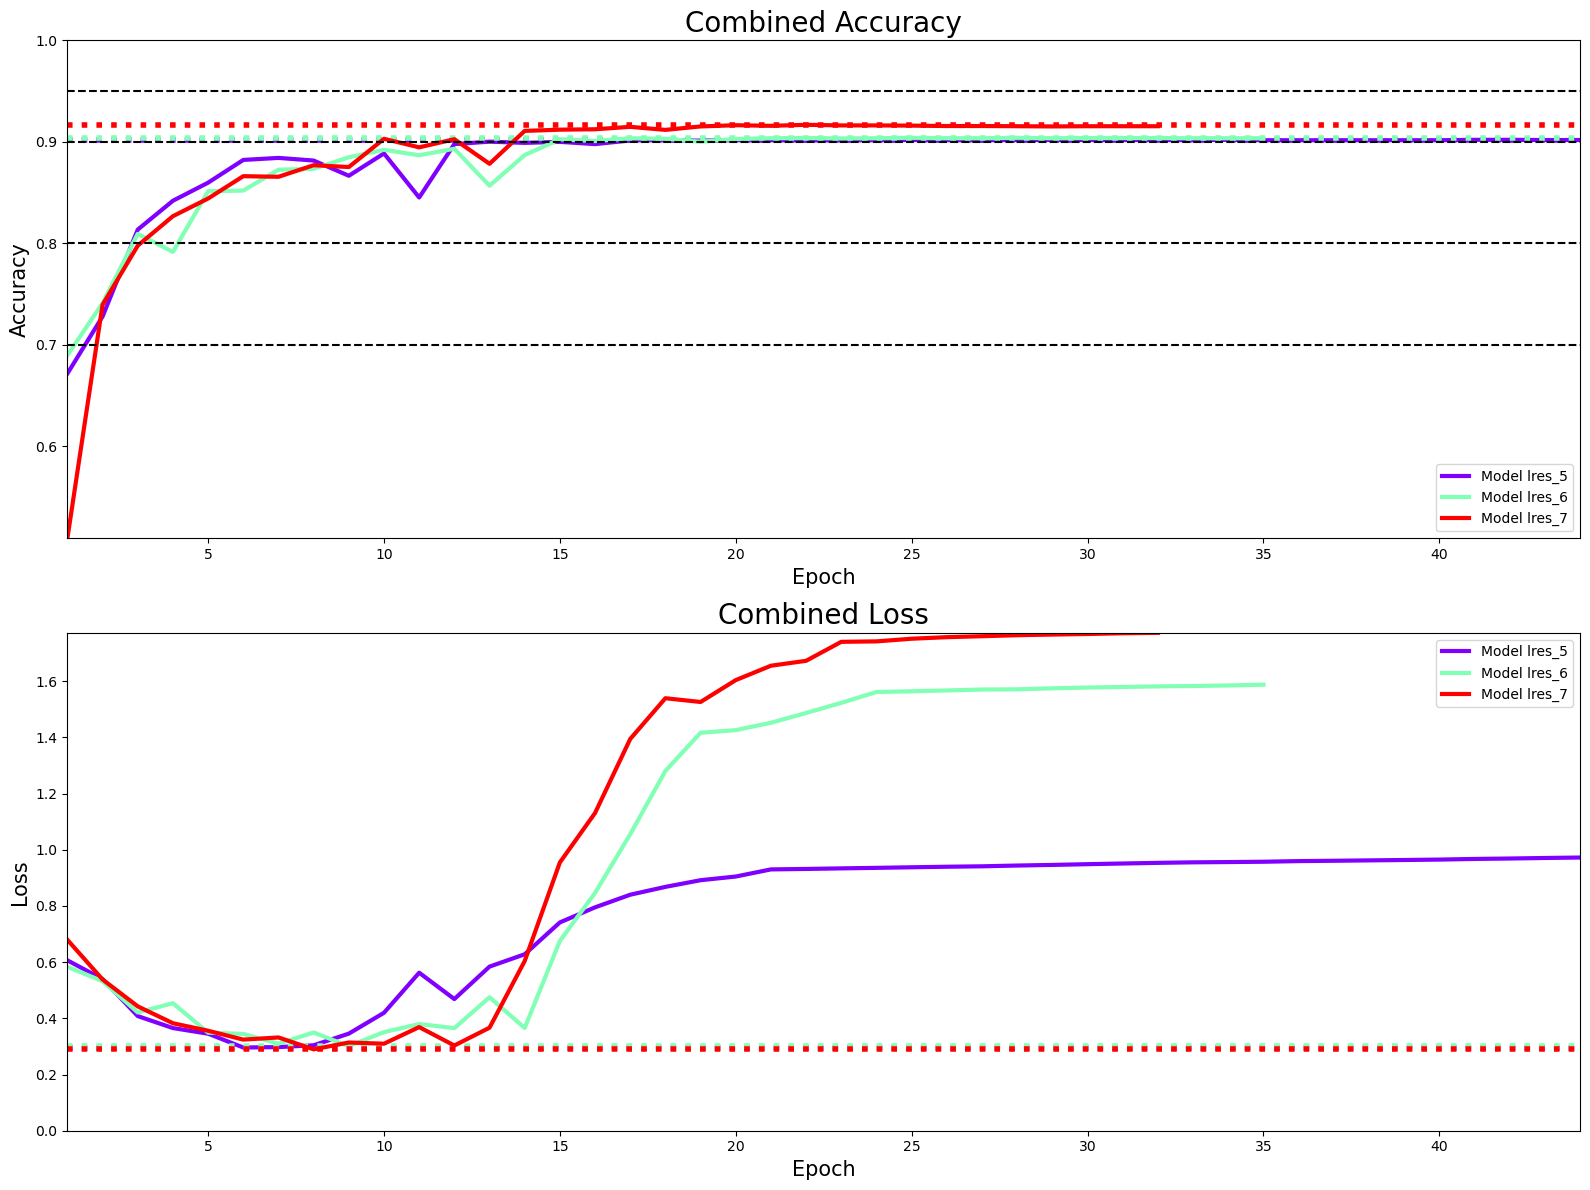

In [47]:
plot_combined_histories(models[3:], history_folder='history_567', charts_folder='charts_567', name='lres')

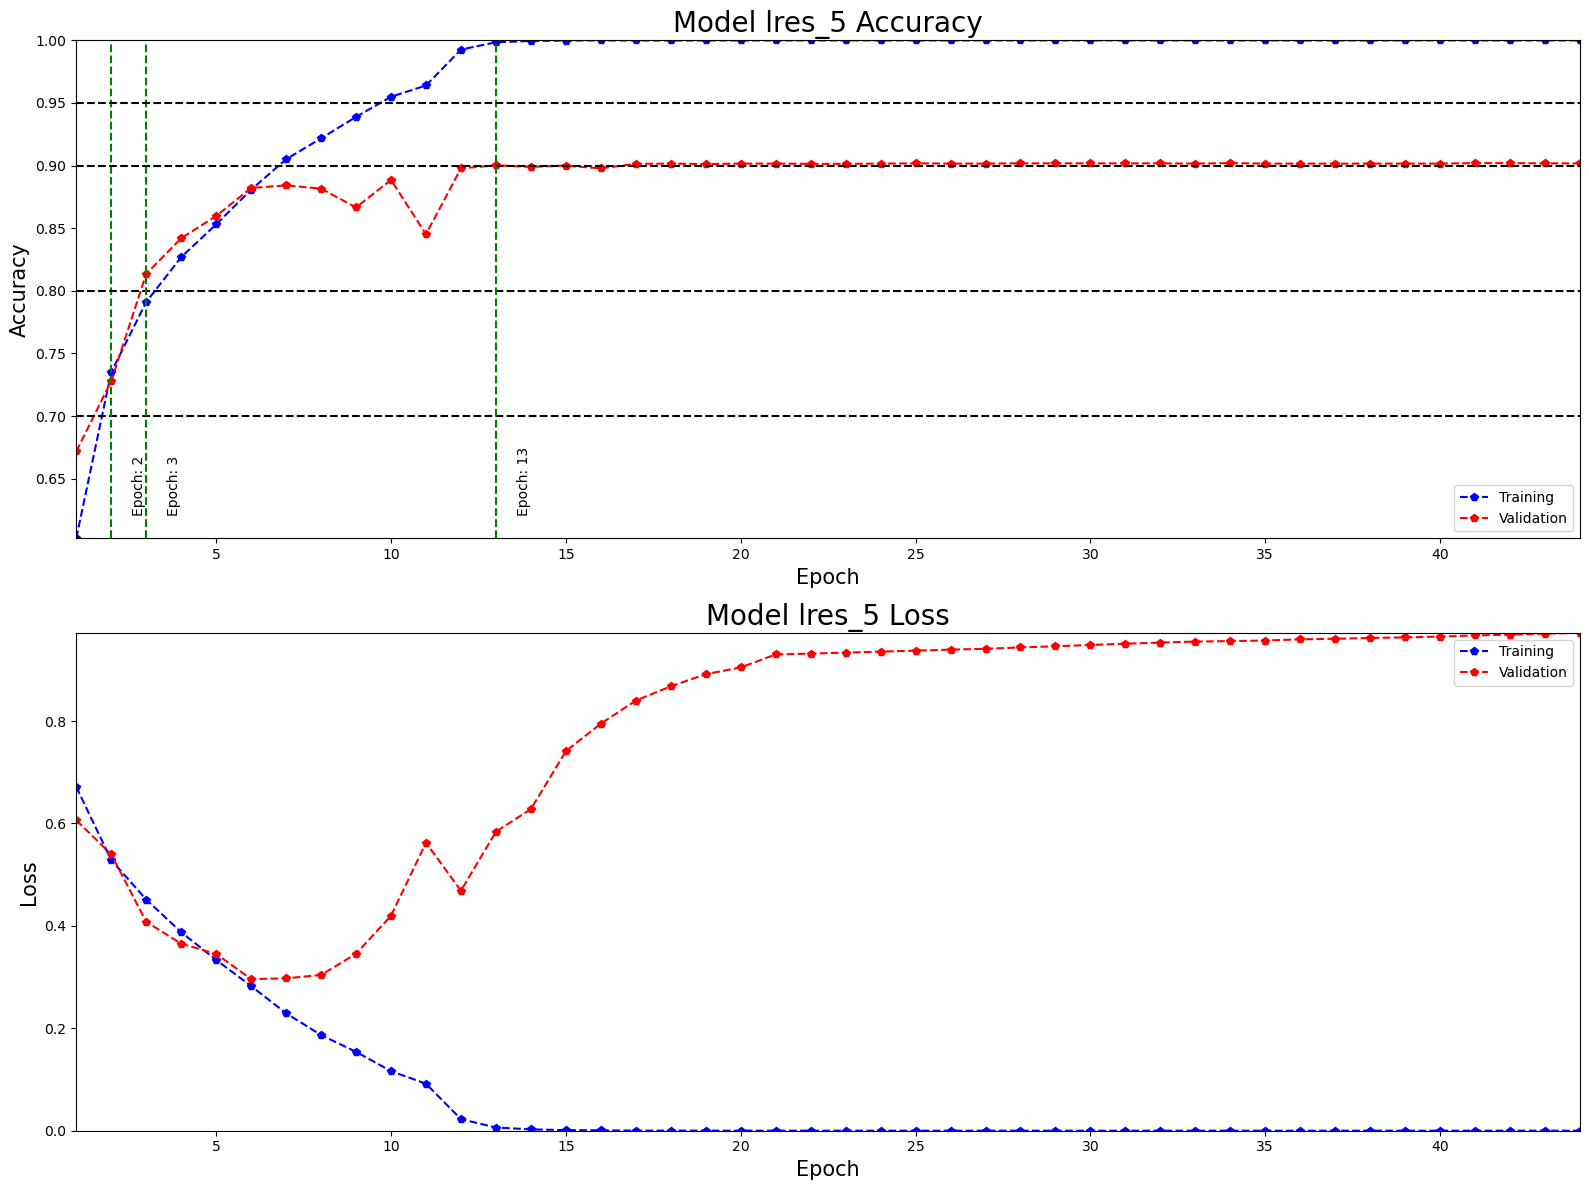

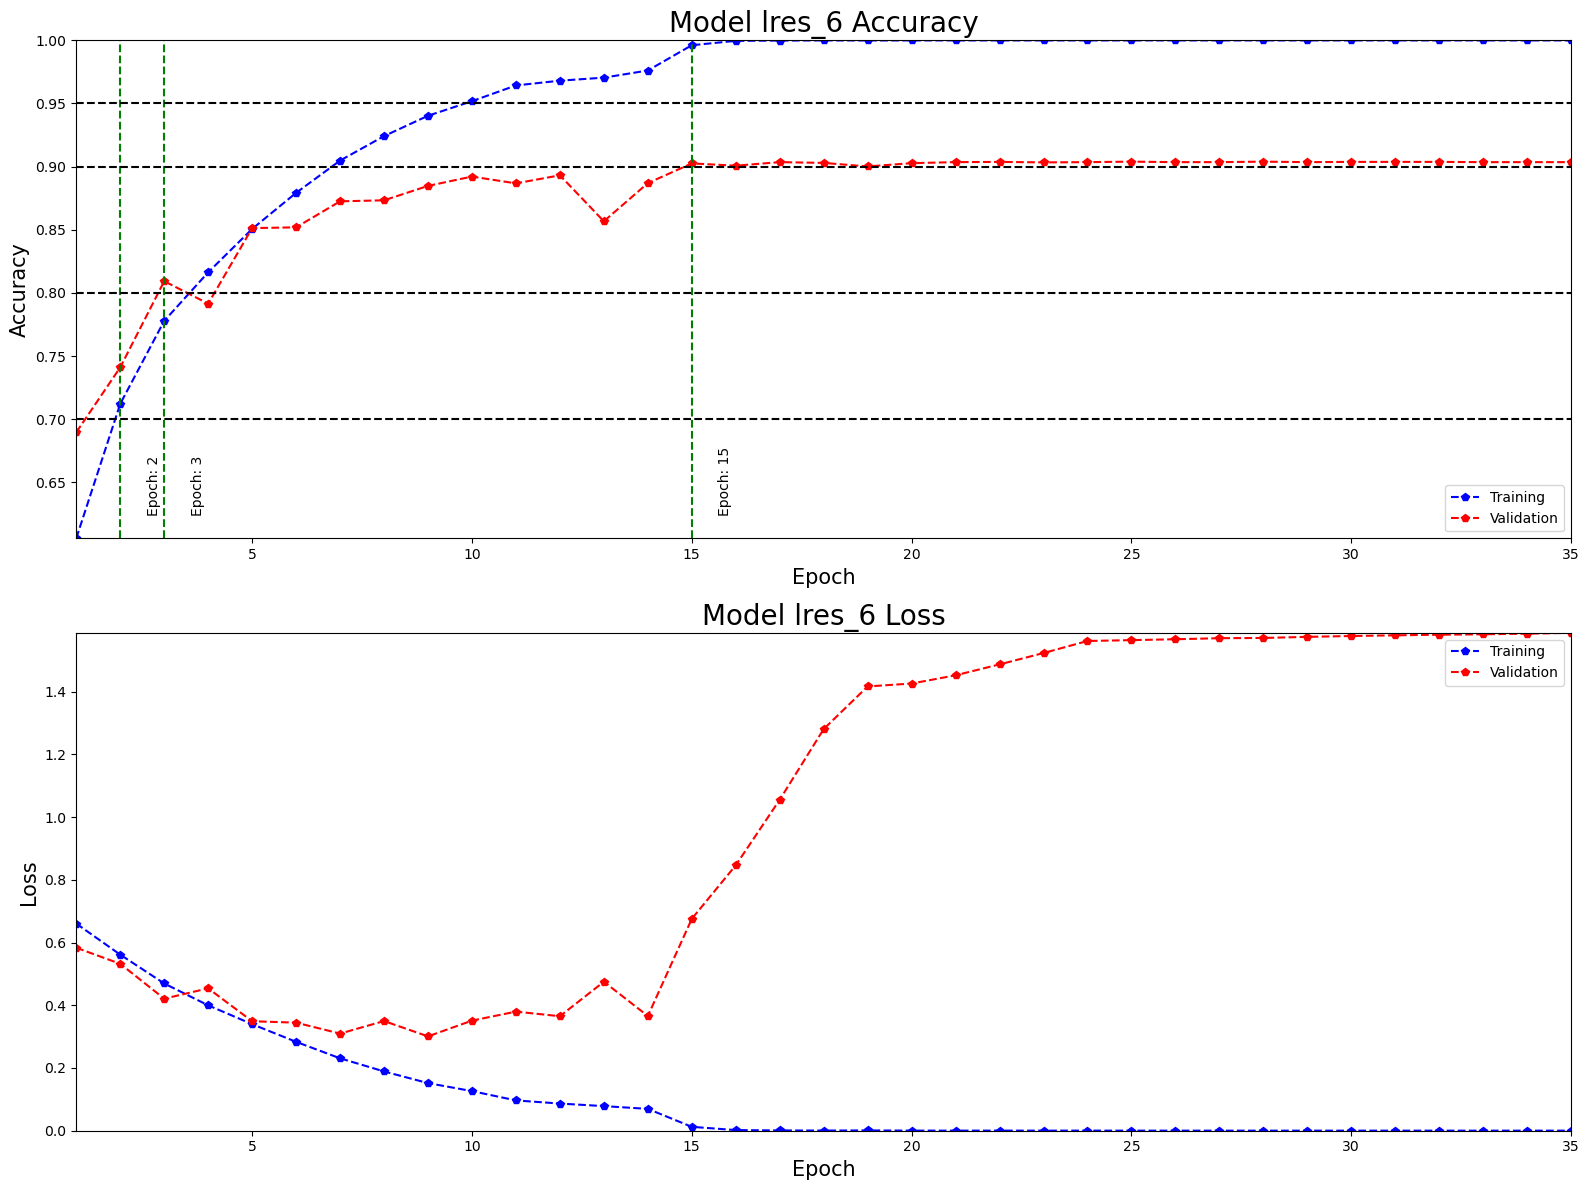

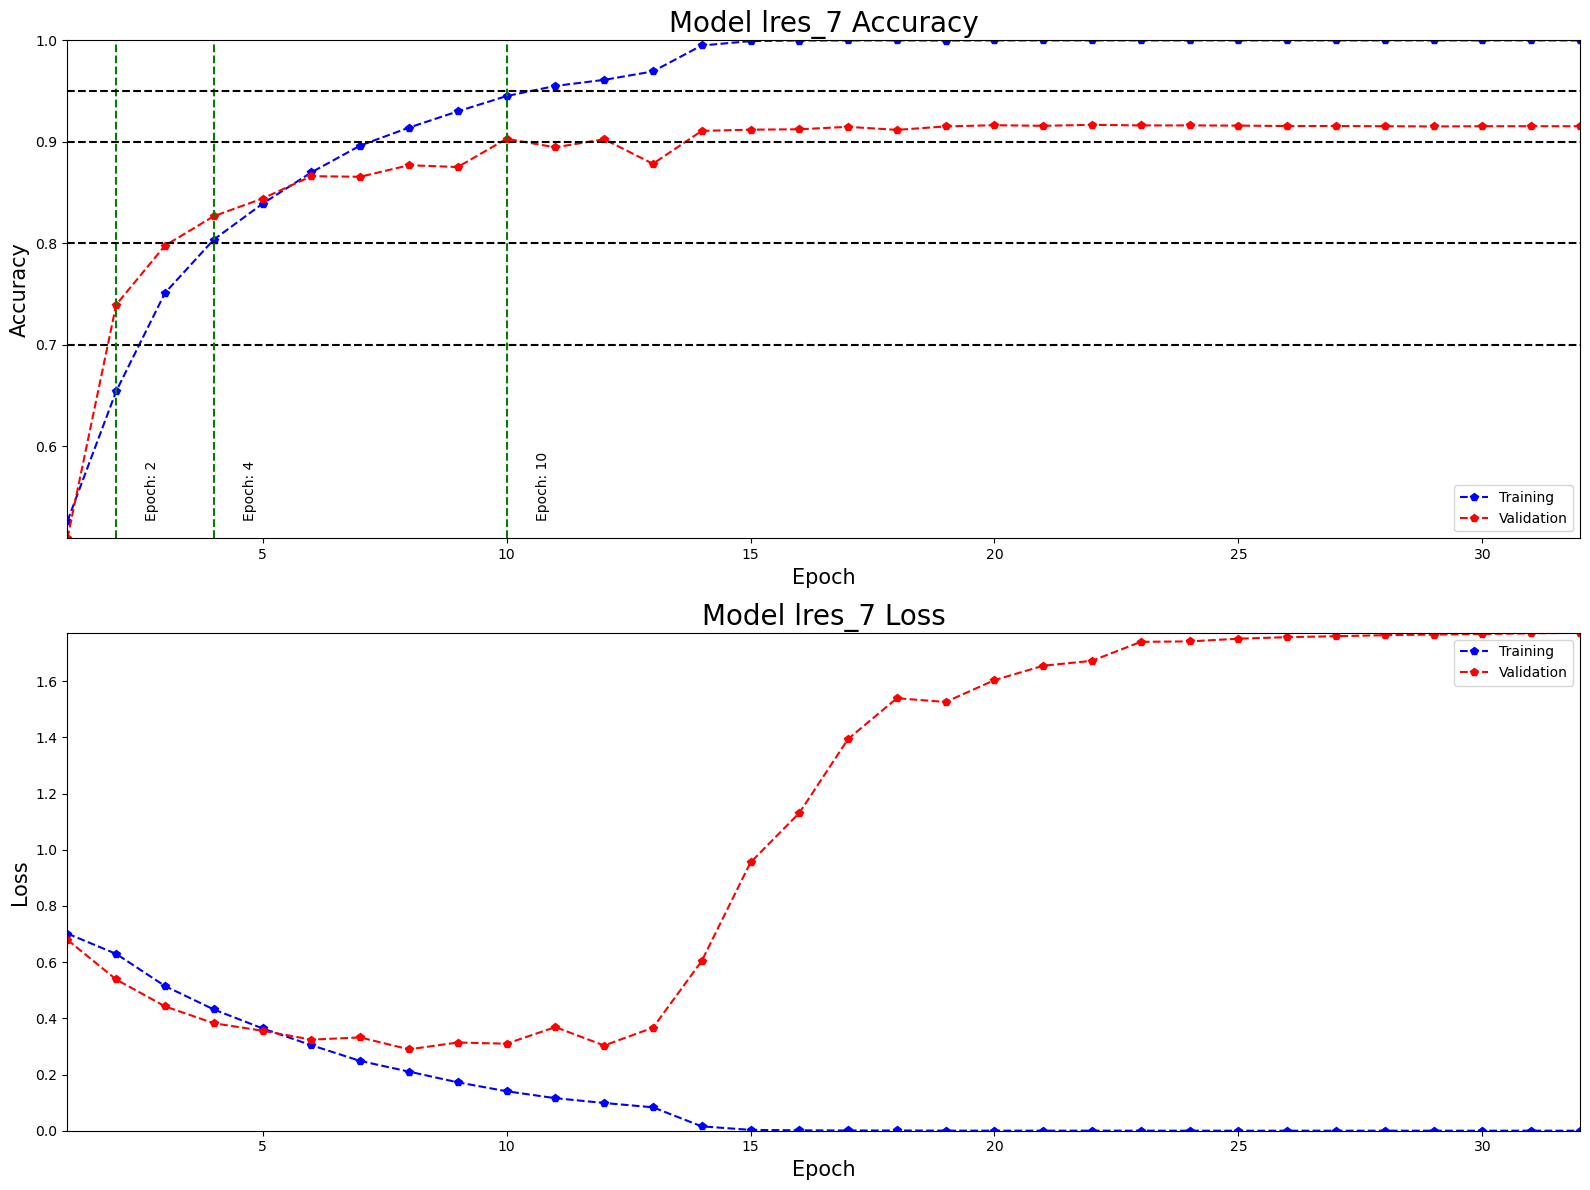

In [48]:
plot_individual_histories(models[3:])

##### Dodanie Dropout

In [49]:
droplres5 = Sequential()
# Block 1
droplres5.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(150, 150, 3)))
droplres5.add(MaxPooling2D(pool_size=(2, 2)))
# Block 2
droplres5.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
droplres5.add(MaxPooling2D(pool_size=(2, 2)))
# Block 3
droplres5.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
droplres5.add(MaxPooling2D(pool_size=(2, 2)))
# Block 4
droplres5.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
droplres5.add(MaxPooling2D(pool_size=(2, 2)))
# Block 5
droplres5.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
droplres5.add(MaxPooling2D(pool_size=(2, 2)))

droplres5.add(Flatten())
droplres5.add(Dropout(0.5))
droplres5.add(Dense(128, activation='relu'))
droplres5.add(Dropout(0.5))
droplres5.add(Dense(1, activation='sigmoid'))

droplres5.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=1e-3), metrics=['accuracy'])
droplres5.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_54 (MaxPoolin  (None, 75, 75, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_55 (Conv2D)          (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_55 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_56 (Conv2D)          (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_56 (MaxPoolin  (None, 18, 18, 64)      

In [50]:
droplres6 = Sequential()
# Block 1
droplres6.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(150, 150, 3)))
droplres6.add(MaxPooling2D(pool_size=(2, 2)))
# Block 2
droplres6.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
droplres6.add(MaxPooling2D(pool_size=(2, 2)))
# Block 3
droplres6.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
droplres6.add(MaxPooling2D(pool_size=(2, 2)))
# Block 4
droplres6.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
droplres6.add(MaxPooling2D(pool_size=(2, 2)))
# Block 5
droplres6.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
droplres6.add(MaxPooling2D(pool_size=(2, 2)))
# Block 6
droplres6.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
droplres6.add(MaxPooling2D(pool_size=(2, 2)))

droplres6.add(Flatten())
droplres6.add(Dropout(0.5))
droplres6.add(Dense(128, activation='relu'))
droplres6.add(Dropout(0.5))
droplres6.add(Dense(1, activation='sigmoid'))

droplres6.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=1e-3), metrics=['accuracy'])
droplres6.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_59 (Conv2D)          (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_59 (MaxPoolin  (None, 75, 75, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_60 (Conv2D)          (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_60 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_61 (Conv2D)          (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_61 (MaxPoolin  (None, 18, 18, 64)     

In [51]:
droplres7 = Sequential()
# Block 1
droplres7.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(150, 150, 3)))
droplres7.add(MaxPooling2D(pool_size=(2, 2)))
# Block 2
droplres7.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
droplres7.add(MaxPooling2D(pool_size=(2, 2)))
# Block 3
droplres7.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
droplres7.add(MaxPooling2D(pool_size=(2, 2)))
# Block 4
droplres7.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
droplres7.add(MaxPooling2D(pool_size=(2, 2)))
# Block 5
droplres7.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
droplres7.add(MaxPooling2D(pool_size=(2, 2)))
# Block 6
droplres7.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
droplres7.add(MaxPooling2D(pool_size=(2, 2)))
# Block 7
droplres7.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
droplres7.add(MaxPooling2D(pool_size=(2, 2)))

droplres7.add(Flatten())
droplres7.add(Dropout(0.5))
droplres7.add(Dense(128, activation='relu'))
droplres7.add(Dropout(0.5))
droplres7.add(Dense(1, activation='sigmoid'))

droplres7.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=1e-3), metrics=['accuracy'])
droplres7.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_65 (Conv2D)          (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_65 (MaxPoolin  (None, 75, 75, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_66 (Conv2D)          (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_66 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_67 (Conv2D)          (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_67 (MaxPoolin  (None, 18, 18, 64)     

In [52]:
fit_and_save_model(droplres5, epochs=1000, callbacks=callbacks, model_name='droplres_5')


Epoch 1/1000
165/274 [=================>............] - ETA: 9s - loss: 0.6872 - accuracy: 0.5544

c:\Users\Urban\.conda\envs\kodilla-edu\lib\site-packages\PIL\TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))


274/274 [==============================] - 32s 114ms/step - loss: 0.6673 - accuracy: 0.5901 - val_loss: 0.6621 - val_accuracy: 0.6014 - lr: 0.0010
Epoch 2/1000
274/274 [==============================] - 30s 109ms/step - loss: 0.5538 - accuracy: 0.7203 - val_loss: 0.4905 - val_accuracy: 0.7683 - lr: 0.0010
Epoch 3/1000
274/274 [==============================] - 30s 109ms/step - loss: 0.4787 - accuracy: 0.7740 - val_loss: 0.4029 - val_accuracy: 0.8207 - lr: 0.0010
Epoch 4/1000
274/274 [==============================] - 30s 110ms/step - loss: 0.4096 - accuracy: 0.8149 - val_loss: 0.4134 - val_accuracy: 0.8117 - lr: 0.0010
Epoch 5/1000
274/274 [==============================] - 31s 111ms/step - loss: 0.3617 - accuracy: 0.8415 - val_loss: 0.3554 - val_accuracy: 0.8443 - lr: 0.0010
Epoch 6/1000
274/274 [==============================] - 30s 109ms/step - loss: 0.3216 - accuracy: 0.8631 - val_loss: 0.4625 - val_accuracy: 0.7943 - lr: 0.0010
Epoch 7/1000
274/274 [==============================]

In [53]:
fit_and_save_model(droplres6, epochs=1000, callbacks=callbacks, model_name='droplres_6')


Epoch 1/1000
274/274 [==============================] - 48s 171ms/step - loss: 0.6879 - accuracy: 0.5666 - val_loss: 0.9596 - val_accuracy: 0.5162 - lr: 0.0010
Epoch 2/1000
274/274 [==============================] - 46s 169ms/step - loss: 0.6227 - accuracy: 0.6693 - val_loss: 0.6303 - val_accuracy: 0.6537 - lr: 0.0010
Epoch 3/1000
274/274 [==============================] - 46s 168ms/step - loss: 0.5205 - accuracy: 0.7463 - val_loss: 0.5198 - val_accuracy: 0.7633 - lr: 0.0010
Epoch 4/1000
274/274 [==============================] - 48s 174ms/step - loss: 0.4381 - accuracy: 0.8022 - val_loss: 0.3908 - val_accuracy: 0.8341 - lr: 0.0010
Epoch 5/1000
274/274 [==============================] - 47s 171ms/step - loss: 0.3683 - accuracy: 0.8383 - val_loss: 0.3623 - val_accuracy: 0.8425 - lr: 0.0010
Epoch 6/1000
274/274 [==============================] - 47s 170ms/step - loss: 0.3137 - accuracy: 0.8677 - val_loss: 0.3423 - val_accuracy: 0.8579 - lr: 0.0010
Epoch 7/1000
274/274 [==================

In [54]:
fit_and_save_model(droplres7, epochs=1000, callbacks=callbacks, model_name='droplres_7')

Epoch 1/1000
274/274 [==============================] - 37s 130ms/step - loss: 0.7095 - accuracy: 0.5418 - val_loss: 0.6637 - val_accuracy: 0.5900 - lr: 0.0010
Epoch 2/1000
274/274 [==============================] - 37s 136ms/step - loss: 0.6579 - accuracy: 0.6341 - val_loss: 0.5827 - val_accuracy: 0.7061 - lr: 0.0010
Epoch 3/1000
274/274 [==============================] - 37s 135ms/step - loss: 0.5439 - accuracy: 0.7338 - val_loss: 0.4742 - val_accuracy: 0.7795 - lr: 0.0010
Epoch 4/1000
274/274 [==============================] - 37s 134ms/step - loss: 0.4460 - accuracy: 0.7972 - val_loss: 0.3813 - val_accuracy: 0.8329 - lr: 0.0010
Epoch 5/1000
274/274 [==============================] - 38s 140ms/step - loss: 0.3730 - accuracy: 0.8365 - val_loss: 0.3370 - val_accuracy: 0.8521 - lr: 0.0010
Epoch 6/1000
274/274 [==============================] - 37s 136ms/step - loss: 0.3128 - accuracy: 0.8683 - val_loss: 0.3676 - val_accuracy: 0.8289 - lr: 0.0010
Epoch 7/1000
274/274 [==================

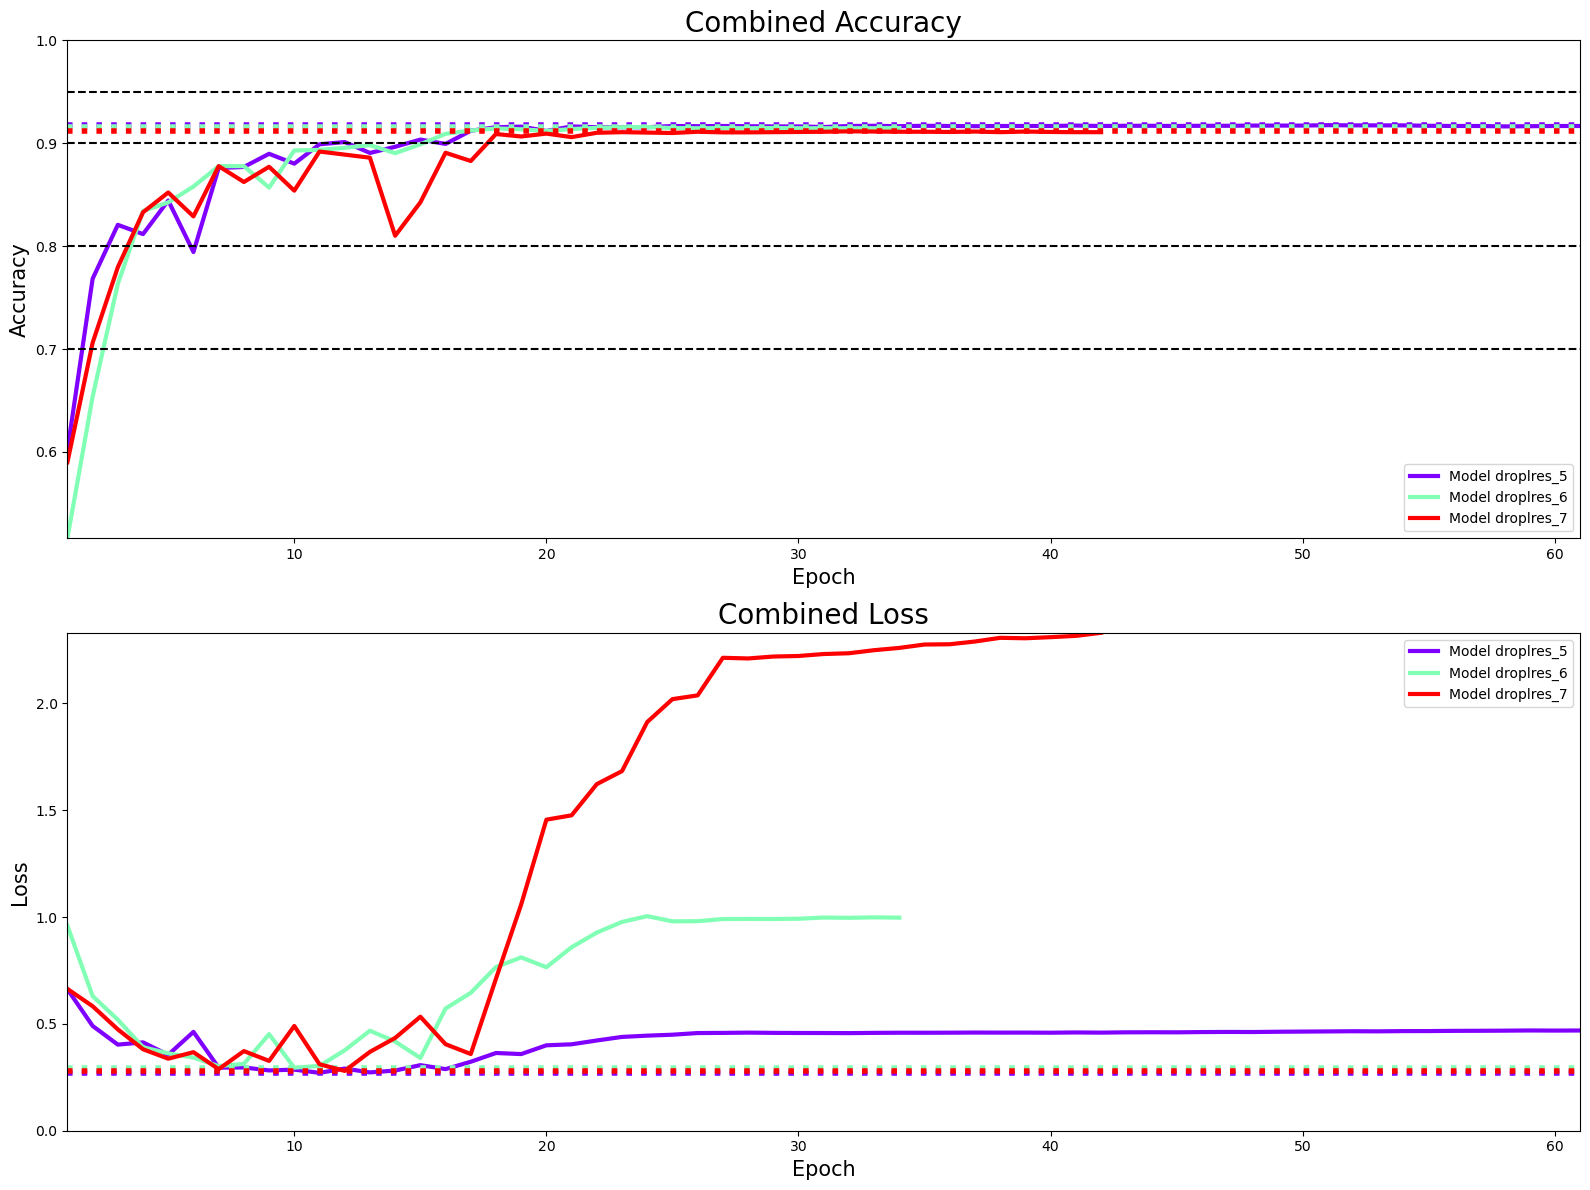

In [56]:
plot_combined_histories(models[6:], history_folder='history_567', charts_folder='charts_567', name='droplres')

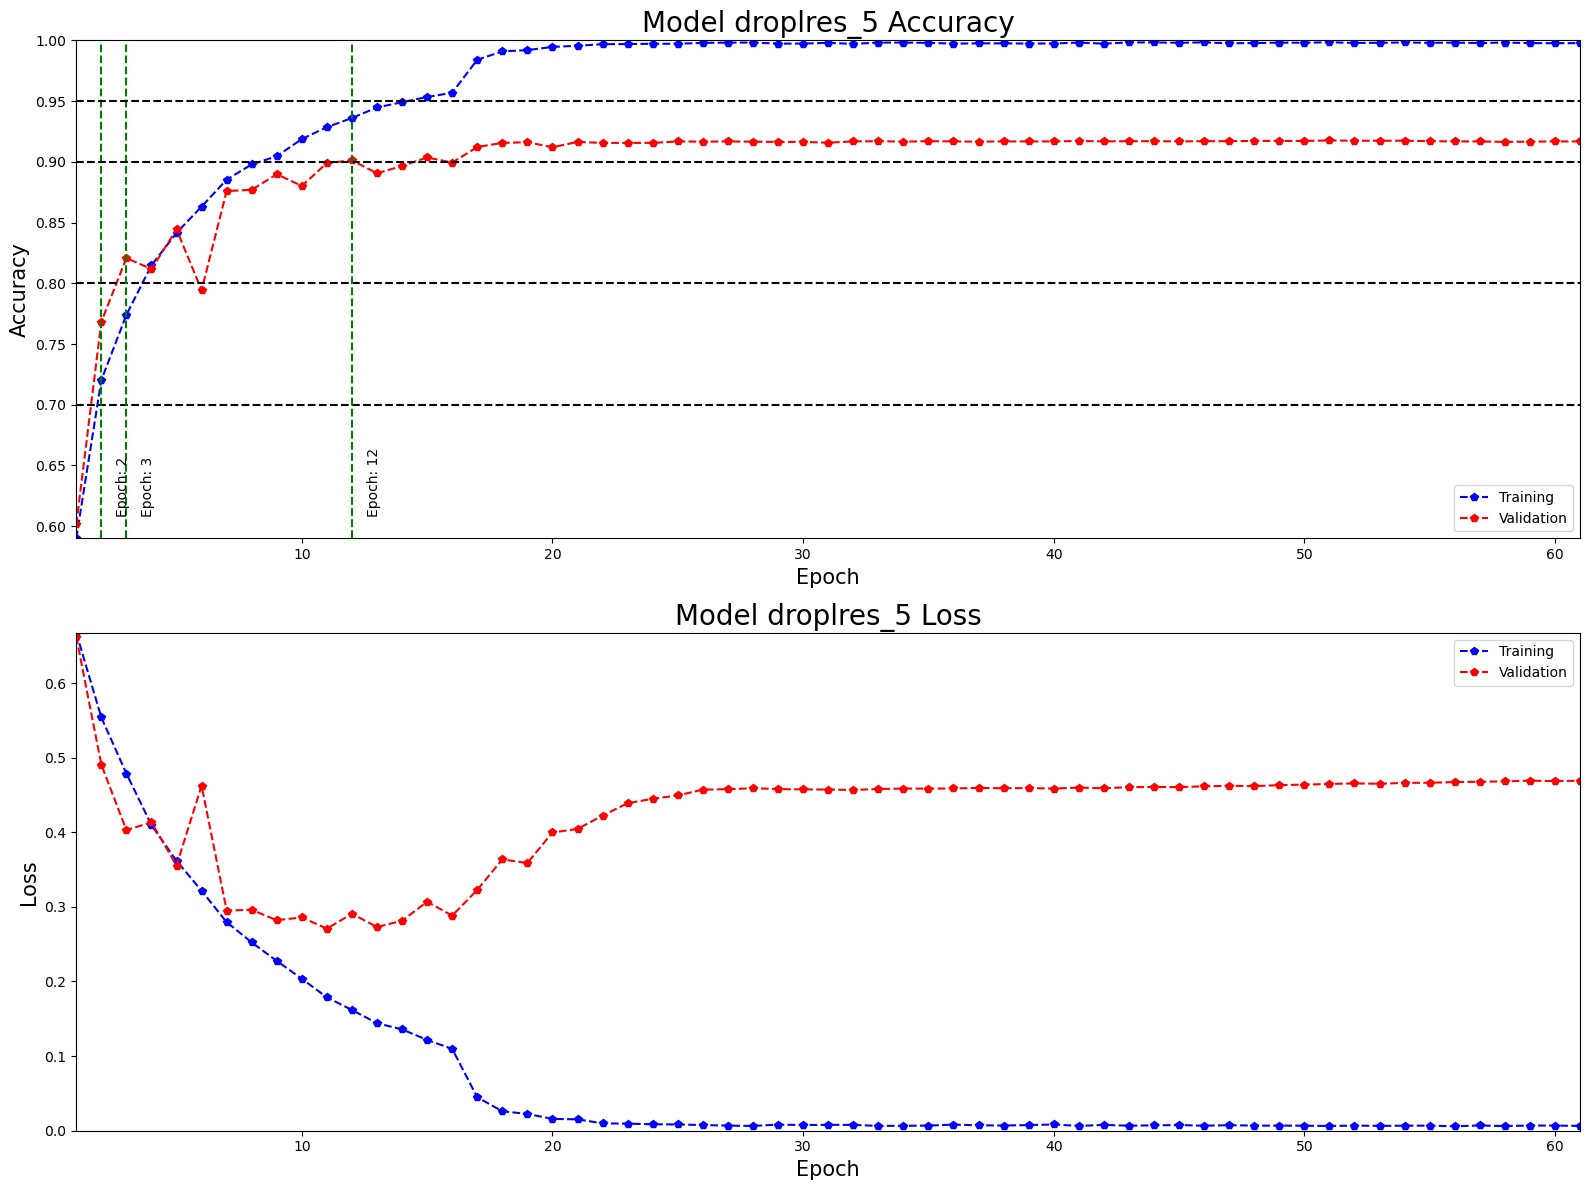

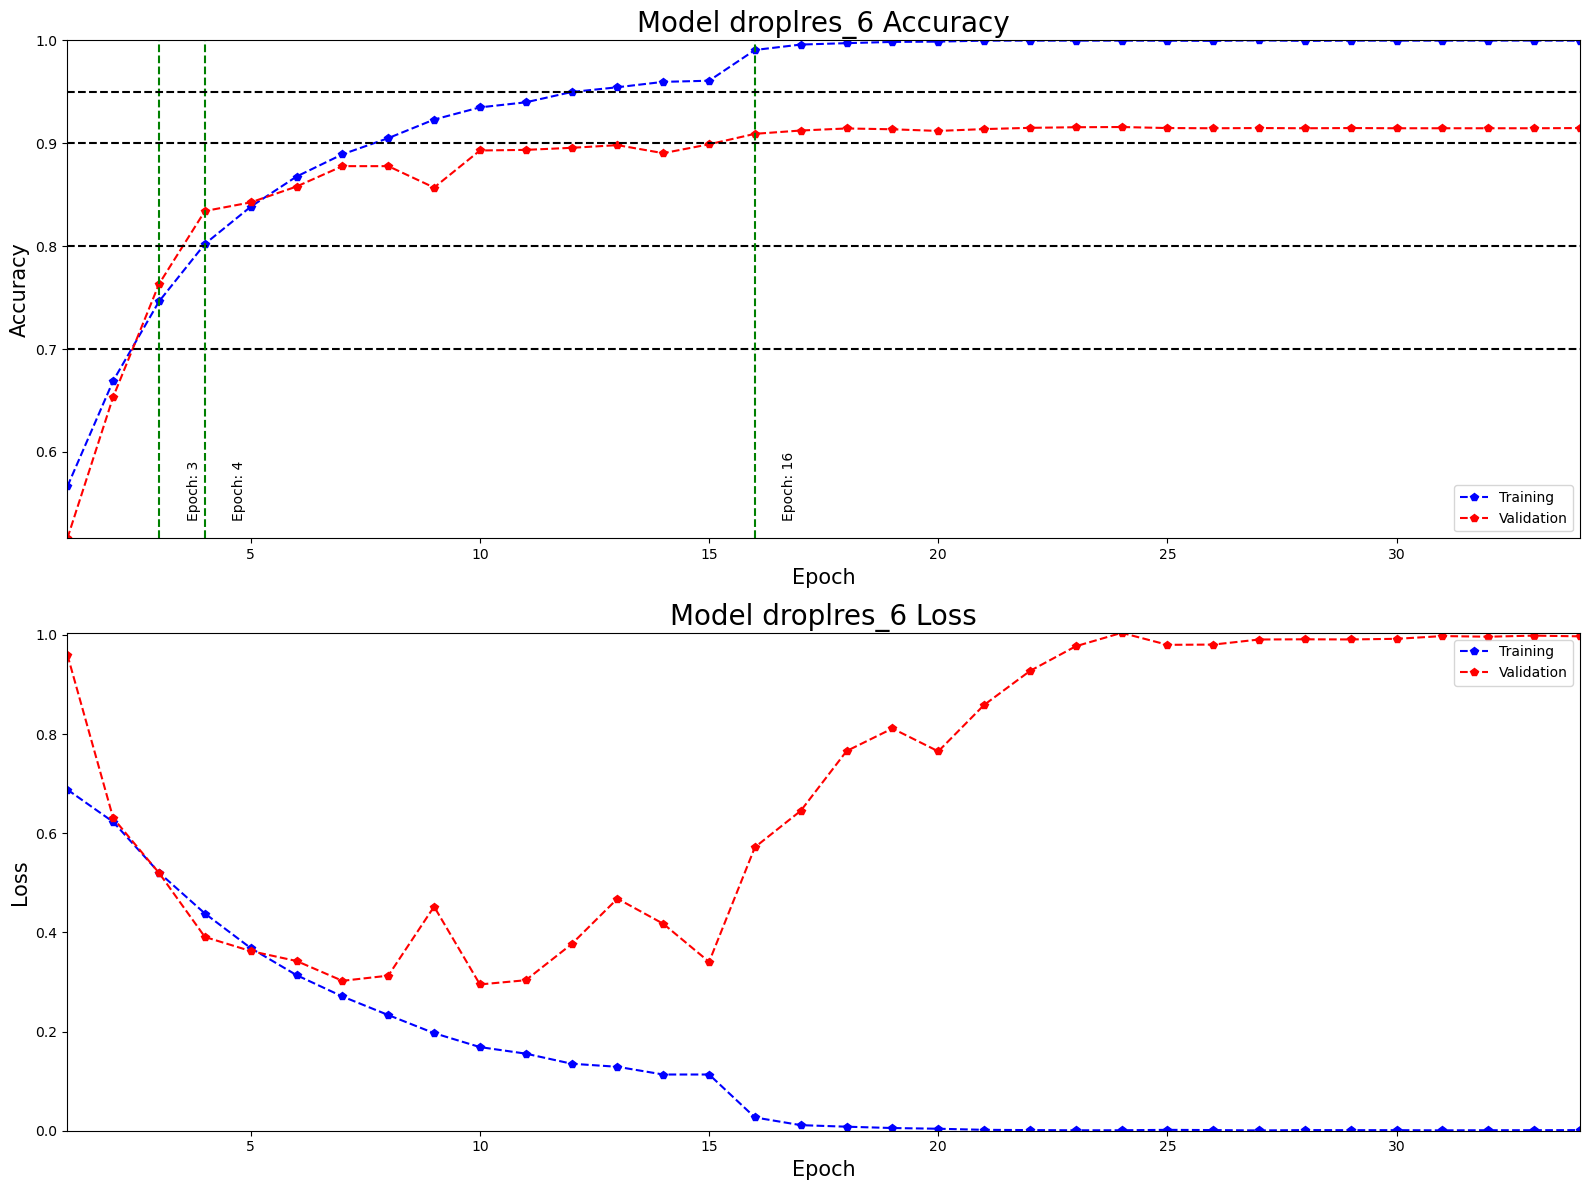

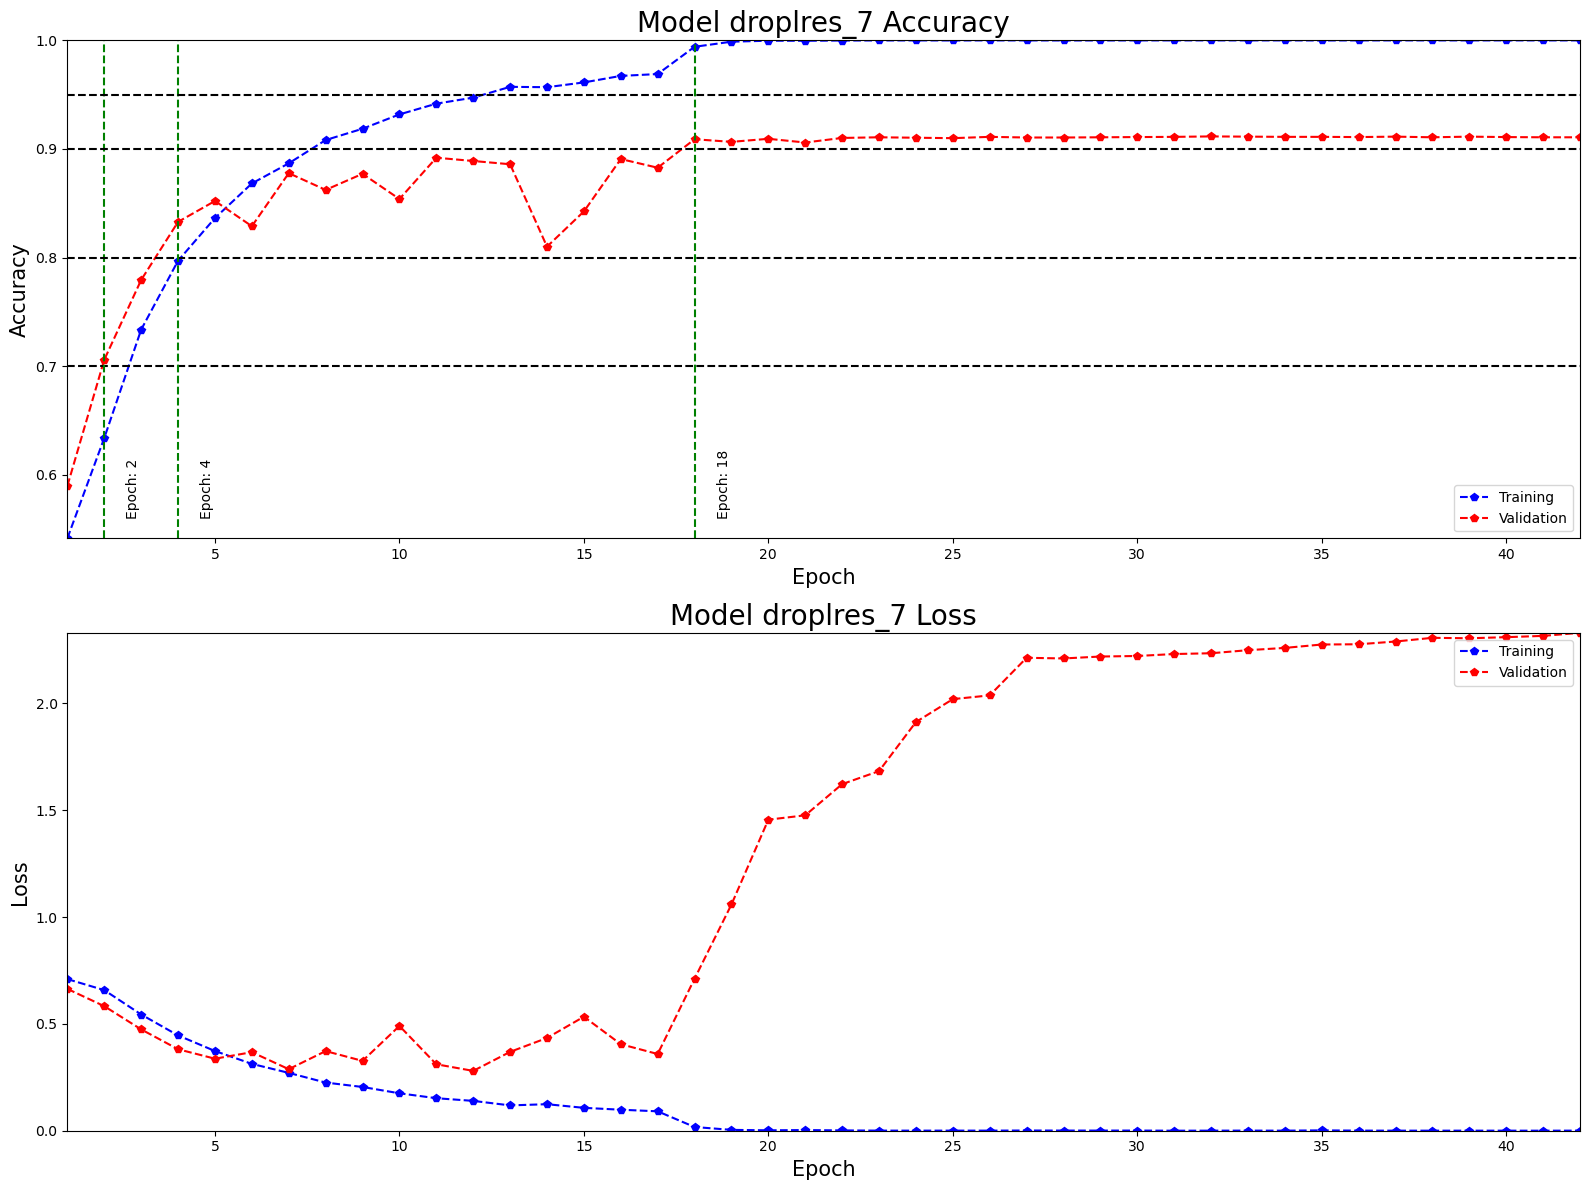

In [57]:
plot_individual_histories(models[6:])

##### Dodanie augmentacji do danych

In [12]:
train_augmentation = ImageDataGenerator(rescale=1./255,
                                        shear_range=0.2,
                                        zoom_range=0.2,
                                        rotation_range=30,
                                        horizontal_flip=True)
aug_generator = train_augmentation.flow_from_directory(train_data_dir,
                                                        target_size=(img_height, img_width),
                                                        batch_size=batch_size, class_mode='binary')


Found 17500 images belonging to 2 classes.


In [65]:
droplresaug5 = Sequential()
# Block 1
droplresaug5.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(150, 150, 3)))
droplresaug5.add(MaxPooling2D(pool_size=(2, 2)))
# Block 2
droplresaug5.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
droplresaug5.add(MaxPooling2D(pool_size=(2, 2)))
# Block 3
droplresaug5.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
droplresaug5.add(MaxPooling2D(pool_size=(2, 2)))
# Block 4
droplresaug5.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
droplresaug5.add(MaxPooling2D(pool_size=(2, 2)))
# Block 5
droplresaug5.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
droplresaug5.add(MaxPooling2D(pool_size=(2, 2)))

droplresaug5.add(Flatten())
droplresaug5.add(Dropout(0.5))
droplresaug5.add(Dense(128, activation='relu'))
droplresaug5.add(Dropout(0.5))
droplresaug5.add(Dense(1, activation='sigmoid'))

droplresaug5.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=1e-3), metrics=['accuracy'])
droplresaug5.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_90 (Conv2D)          (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_90 (MaxPoolin  (None, 75, 75, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_91 (Conv2D)          (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_91 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_92 (Conv2D)          (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_92 (MaxPoolin  (None, 18, 18, 64)     

In [62]:
droplresaug6 = Sequential()
# Block 1
droplresaug6.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(150, 150, 3)))
droplresaug6.add(MaxPooling2D(pool_size=(2, 2)))
# Block 2
droplresaug6.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
droplresaug6.add(MaxPooling2D(pool_size=(2, 2)))
# Block 3
droplresaug6.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
droplresaug6.add(MaxPooling2D(pool_size=(2, 2)))
# Block 4
droplresaug6.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
droplresaug6.add(MaxPooling2D(pool_size=(2, 2)))
# Block 5
droplresaug6.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
droplresaug6.add(MaxPooling2D(pool_size=(2, 2)))
# Block 6
droplresaug6.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
droplresaug6.add(MaxPooling2D(pool_size=(2, 2)))

droplresaug6.add(Flatten())
droplresaug6.add(Dropout(0.5))
droplresaug6.add(Dense(128, activation='relu'))
droplresaug6.add(Dropout(0.5))
droplresaug6.add(Dense(1, activation='sigmoid'))

droplresaug6.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=1e-3), metrics=['accuracy'])
droplresaug6.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_77 (Conv2D)          (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_77 (MaxPoolin  (None, 75, 75, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_78 (Conv2D)          (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_78 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_79 (Conv2D)          (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_79 (MaxPoolin  (None, 18, 18, 64)     

In [63]:
droplresaug7 = Sequential()
# Block 1
droplresaug7.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(150, 150, 3)))
droplresaug7.add(MaxPooling2D(pool_size=(2, 2)))
# Block 2
droplresaug7.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
droplresaug7.add(MaxPooling2D(pool_size=(2, 2)))
# Block 3
droplresaug7.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
droplresaug7.add(MaxPooling2D(pool_size=(2, 2)))
# Block 4
droplresaug7.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
droplresaug7.add(MaxPooling2D(pool_size=(2, 2)))
# Block 5
droplresaug7.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
droplresaug7.add(MaxPooling2D(pool_size=(2, 2)))
# Block 6
droplresaug7.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
droplresaug7.add(MaxPooling2D(pool_size=(2, 2)))
# Block 7
droplresaug7.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
droplresaug7.add(MaxPooling2D(pool_size=(2, 2)))

droplresaug7.add(Flatten())
droplresaug7.add(Dropout(0.5))
droplresaug7.add(Dense(128, activation='relu'))
droplresaug7.add(Dropout(0.5))
droplresaug7.add(Dense(1, activation='sigmoid'))

droplresaug7.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=1e-3), metrics=['accuracy'])
droplresaug7.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_83 (Conv2D)          (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_83 (MaxPoolin  (None, 75, 75, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_84 (Conv2D)          (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_84 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_85 (Conv2D)          (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_85 (MaxPoolin  (None, 18, 18, 64)     

In [66]:
fit_and_save_model(droplresaug5, train_set=aug_generator, epochs=1000, callbacks=callbacks, model_name='droplresaug_5')


Epoch 1/1000
264/274 [===========================>..] - ETA: 2s - loss: 0.6758 - accuracy: 0.5771

c:\Users\Urban\.conda\envs\kodilla-edu\lib\site-packages\PIL\TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))


274/274 [==============================] - 73s 266ms/step - loss: 0.6733 - accuracy: 0.5804 - val_loss: 0.6387 - val_accuracy: 0.6353 - lr: 0.0010
Epoch 2/1000
274/274 [==============================] - 70s 256ms/step - loss: 0.5956 - accuracy: 0.6823 - val_loss: 0.5725 - val_accuracy: 0.7109 - lr: 0.0010
Epoch 3/1000
274/274 [==============================] - 71s 257ms/step - loss: 0.5339 - accuracy: 0.7341 - val_loss: 0.4759 - val_accuracy: 0.7853 - lr: 0.0010
Epoch 4/1000
274/274 [==============================] - 71s 258ms/step - loss: 0.4920 - accuracy: 0.7646 - val_loss: 0.4435 - val_accuracy: 0.7923 - lr: 0.0010
Epoch 5/1000
274/274 [==============================] - 71s 259ms/step - loss: 0.4588 - accuracy: 0.7872 - val_loss: 0.4556 - val_accuracy: 0.7899 - lr: 0.0010
Epoch 6/1000
274/274 [==============================] - 70s 256ms/step - loss: 0.4307 - accuracy: 0.8009 - val_loss: 0.3662 - val_accuracy: 0.8371 - lr: 0.0010
Epoch 7/1000
274/274 [==============================]

In [67]:
fit_and_save_model(droplresaug6, train_set=aug_generator, epochs=1000, callbacks=callbacks, model_name='droplresaug_6')


Epoch 1/1000
274/274 [==============================] - 72s 258ms/step - loss: 0.7015 - accuracy: 0.5454 - val_loss: 0.6681 - val_accuracy: 0.5774 - lr: 0.0010
Epoch 2/1000
274/274 [==============================] - 72s 261ms/step - loss: 0.6479 - accuracy: 0.6301 - val_loss: 0.5942 - val_accuracy: 0.6811 - lr: 0.0010
Epoch 3/1000
274/274 [==============================] - 71s 257ms/step - loss: 0.5837 - accuracy: 0.6971 - val_loss: 0.5142 - val_accuracy: 0.7475 - lr: 0.0010
Epoch 4/1000
274/274 [==============================] - 71s 258ms/step - loss: 0.5291 - accuracy: 0.7413 - val_loss: 0.5328 - val_accuracy: 0.7351 - lr: 0.0010
Epoch 5/1000
274/274 [==============================] - 71s 258ms/step - loss: 0.4850 - accuracy: 0.7698 - val_loss: 0.4380 - val_accuracy: 0.8005 - lr: 0.0010
Epoch 6/1000
274/274 [==============================] - 71s 259ms/step - loss: 0.4490 - accuracy: 0.7938 - val_loss: 0.4065 - val_accuracy: 0.8217 - lr: 0.0010
Epoch 7/1000
274/274 [==================

In [68]:
fit_and_save_model(droplresaug7, train_set=aug_generator, epochs=1000, callbacks=callbacks, model_name='droplresaug_7')

Epoch 1/1000
274/274 [==============================] - 71s 257ms/step - loss: 0.6929 - accuracy: 0.5355 - val_loss: 0.6601 - val_accuracy: 0.5838 - lr: 0.0010
Epoch 2/1000
274/274 [==============================] - 70s 255ms/step - loss: 0.6486 - accuracy: 0.6322 - val_loss: 0.5983 - val_accuracy: 0.7101 - lr: 0.0010
Epoch 3/1000
274/274 [==============================] - 70s 255ms/step - loss: 0.5729 - accuracy: 0.7089 - val_loss: 0.5729 - val_accuracy: 0.7021 - lr: 0.0010
Epoch 4/1000
274/274 [==============================] - 70s 254ms/step - loss: 0.5160 - accuracy: 0.7503 - val_loss: 0.4705 - val_accuracy: 0.7727 - lr: 0.0010
Epoch 5/1000
274/274 [==============================] - 70s 257ms/step - loss: 0.4795 - accuracy: 0.7767 - val_loss: 0.4404 - val_accuracy: 0.7953 - lr: 0.0010
Epoch 6/1000
274/274 [==============================] - 70s 257ms/step - loss: 0.4537 - accuracy: 0.7958 - val_loss: 0.3793 - val_accuracy: 0.8317 - lr: 0.0010
Epoch 7/1000
274/274 [==================

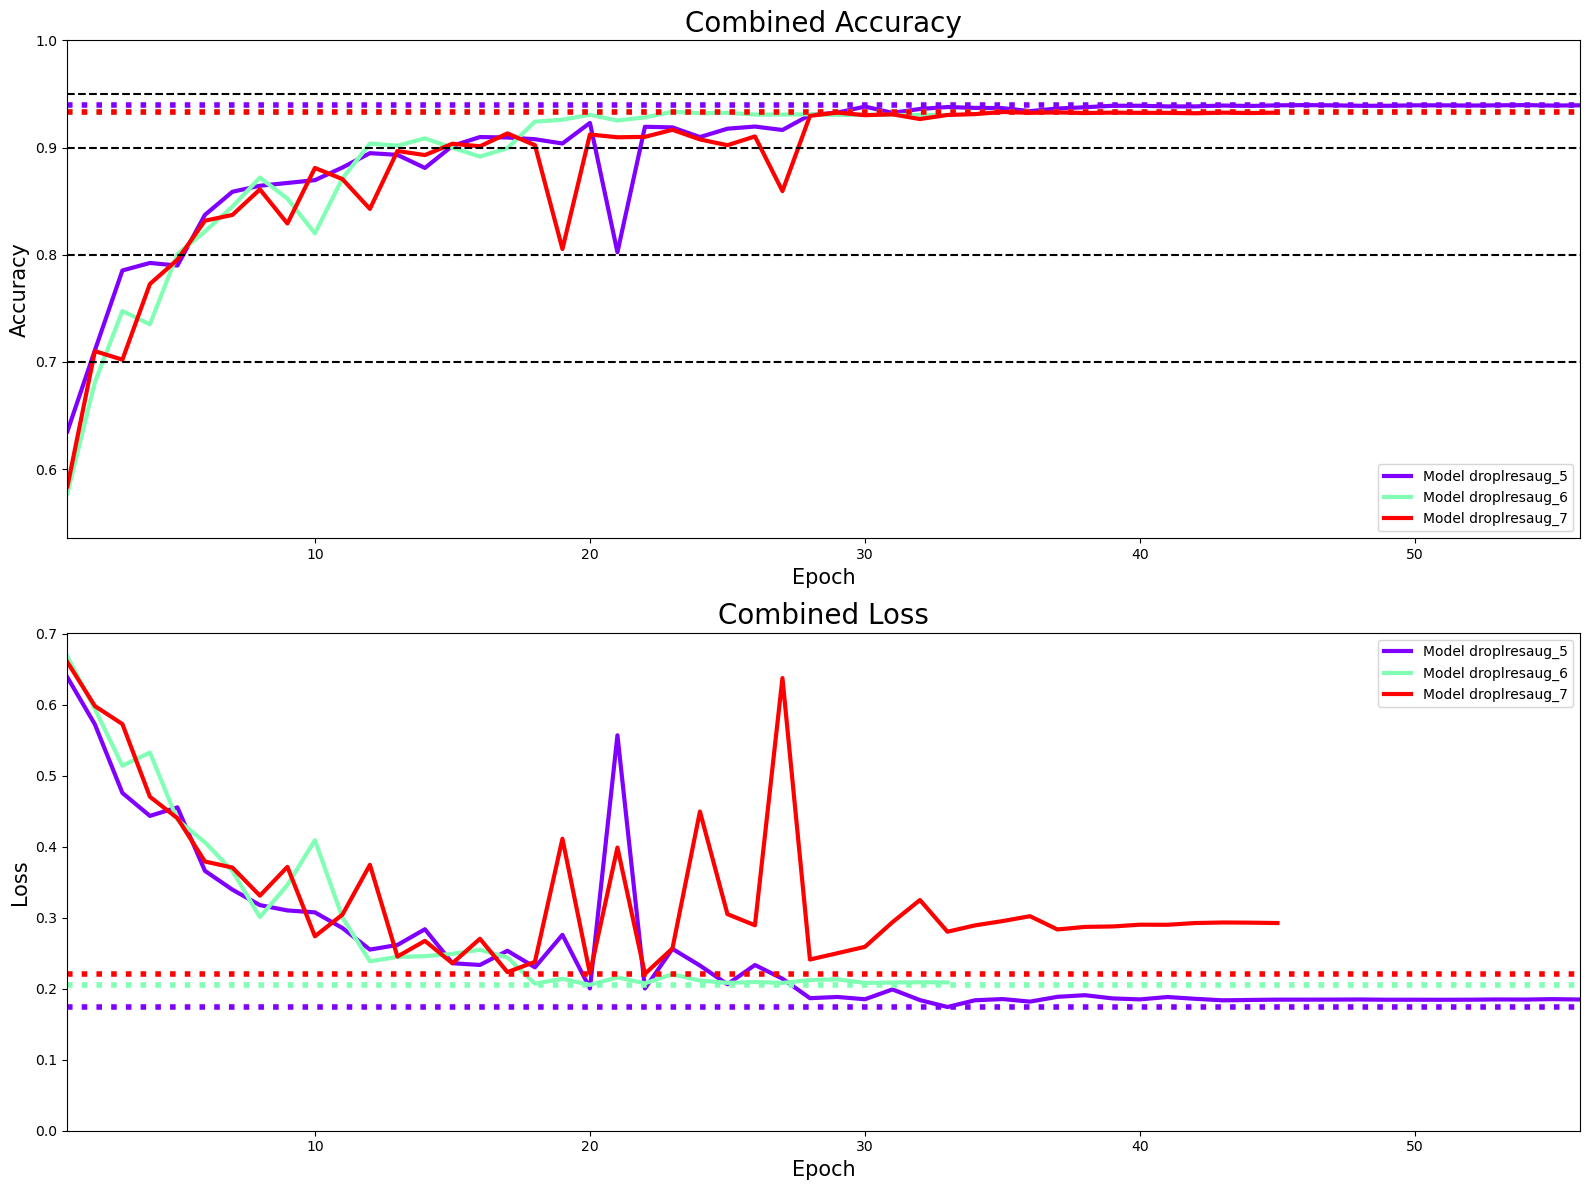

In [70]:
plot_combined_histories(models[9:], history_folder='history_567', charts_folder='charts_567', name='droplresaug')

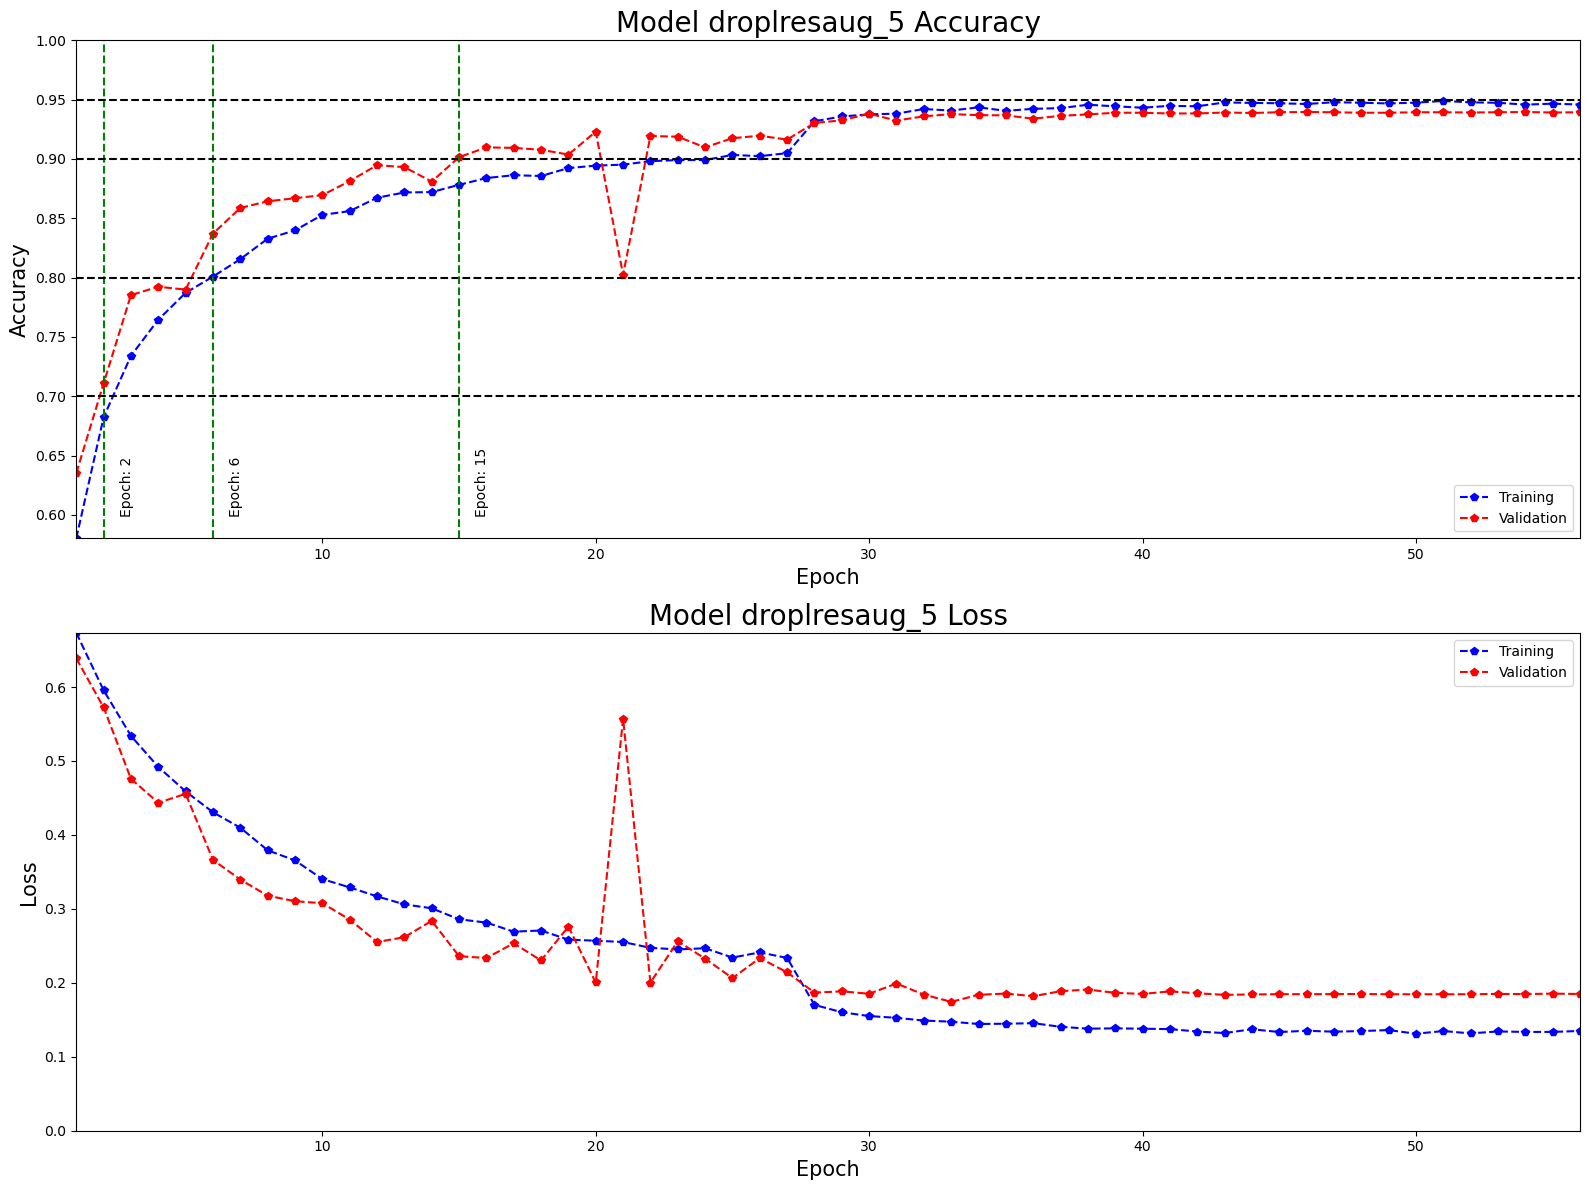

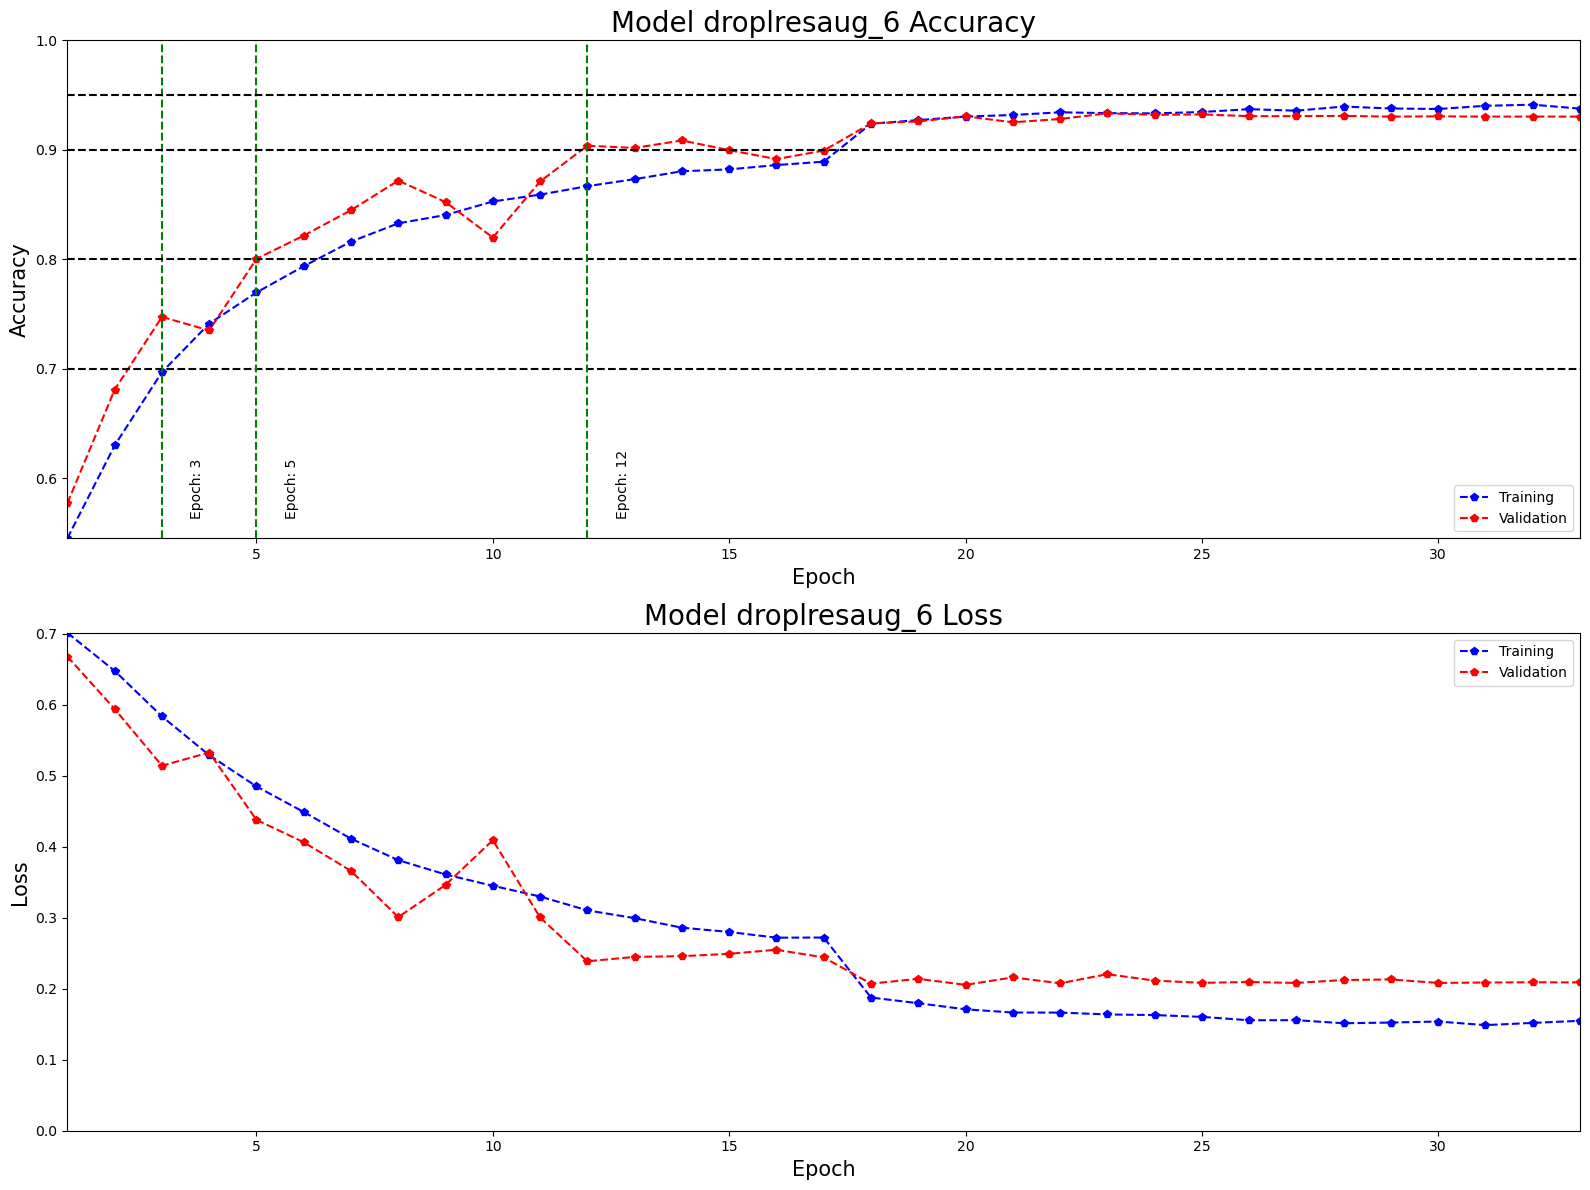

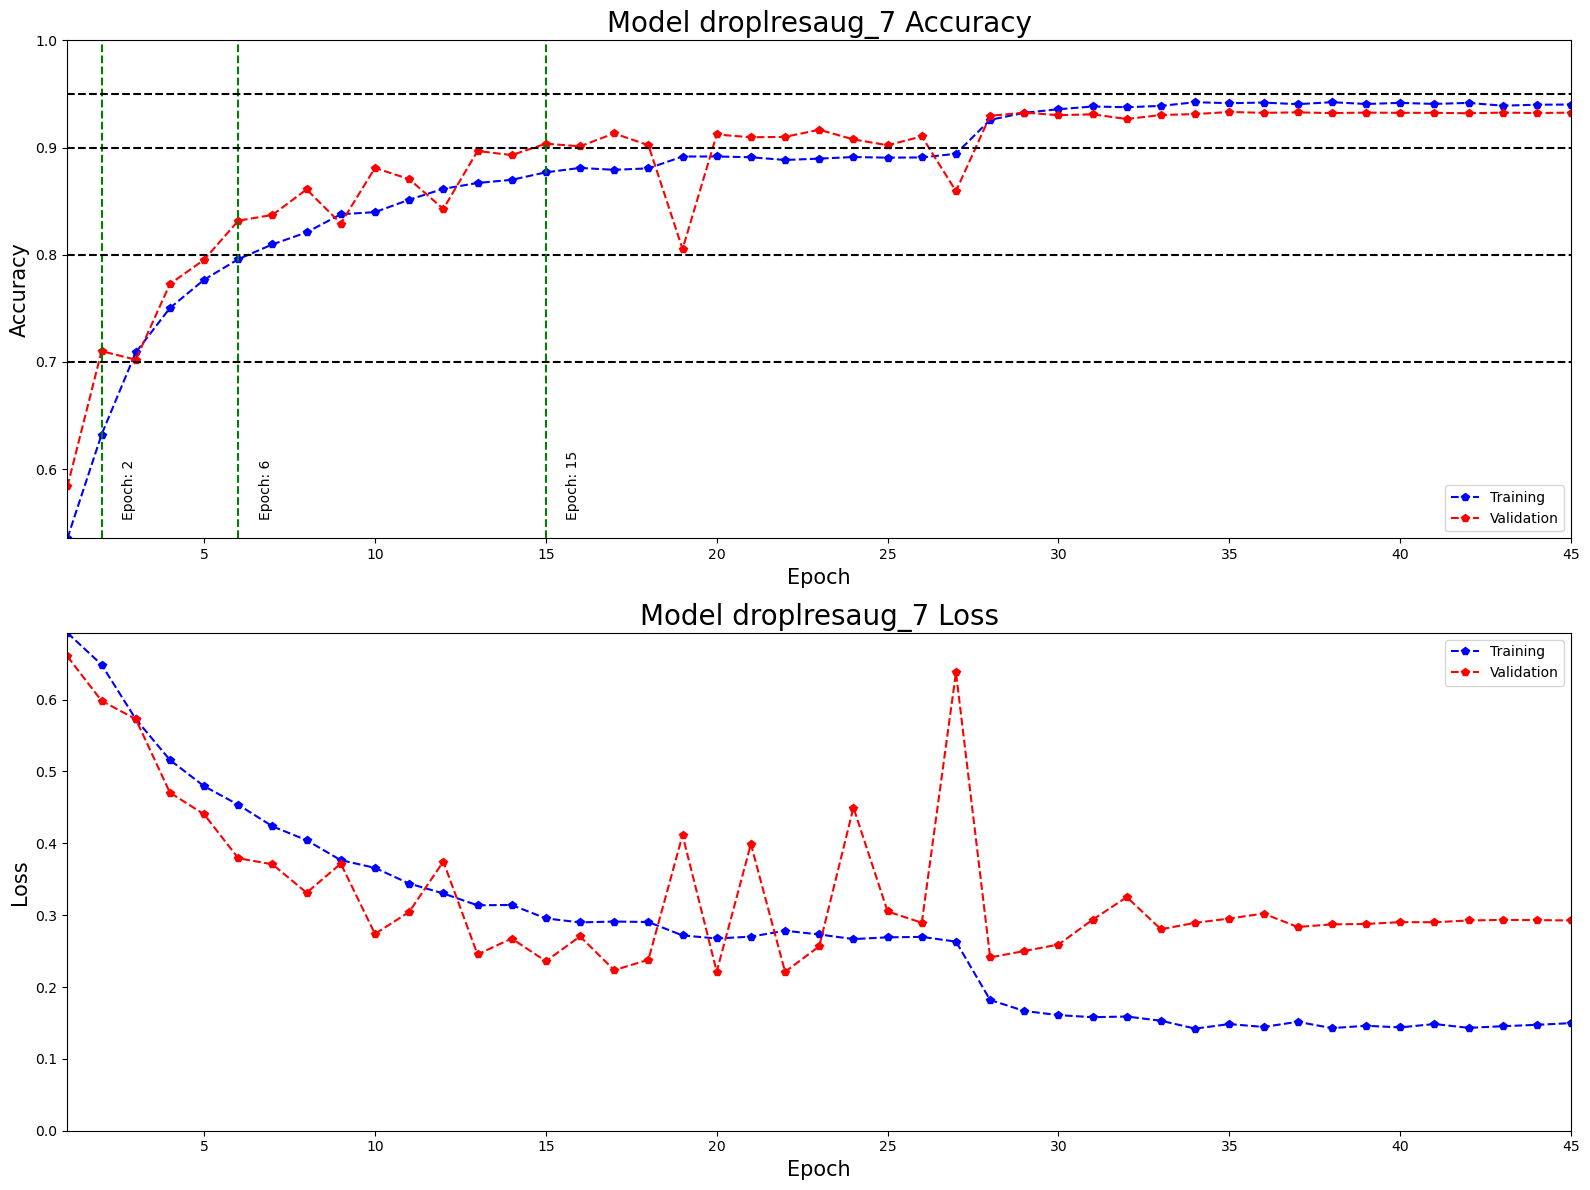

In [71]:
plot_individual_histories(models[9:])

##### Dodanie BatchNormalization i regularyzacji L2

In [74]:
final5 = Sequential()

# Blok 1
final5.add(Conv2D(16, (3,3), 
                     padding='same',
                     kernel_regularizer=l2(1e-4),
                     use_bias=False,
                     input_shape=(150, 150, 3)))
final5.add(BatchNormalization())
final5.add(Activation('relu'))
final5.add(MaxPooling2D(pool_size=(2, 2)))

# Blok 2
final5.add(Conv2D(32, (3,3), 
                     padding='same',
                     kernel_regularizer=l2(1e-4),
                     use_bias=False))
final5.add(BatchNormalization())
final5.add(Activation('relu'))
final5.add(MaxPooling2D(pool_size=(2, 2)))

# Blok 3
final5.add(Conv2D(64, (3,3), 
                     padding='same',
                     kernel_regularizer=l2(1e-4),
                     use_bias=False))
final5.add(BatchNormalization())
final5.add(Activation('relu'))
final5.add(MaxPooling2D(pool_size=(2, 2)))

# Blok 4
final5.add(Conv2D(128, (3,3), 
                     padding='same',
                     kernel_regularizer=l2(1e-4),
                     use_bias=False))
final5.add(BatchNormalization())
final5.add(Activation('relu'))
final5.add(MaxPooling2D(pool_size=(2, 2)))

# Blok 5
final5.add(Conv2D(256, (3,3), 
                     padding='same',
                     kernel_regularizer=l2(1e-4),
                     use_bias=False))
final5.add(BatchNormalization())
final5.add(Activation('relu'))
final5.add(MaxPooling2D(pool_size=(2, 2)))

# Klasyfikator
final5.add(Flatten())
final5.add(Dropout(0.5))

final5.add(Dense(128,
                 kernel_regularizer=l2(1e-4),
                 use_bias=False))
final5.add(BatchNormalization())
final5.add(Activation('relu'))
final5.add(Dropout(0.5))

final5.add(Dense(1, activation='sigmoid'))

final5.compile(loss='binary_crossentropy',
               optimizer=RMSprop(learning_rate=1e-3),
               metrics=['accuracy'])

final5.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_95 (Conv2D)          (None, 150, 150, 16)      432       
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 16)     64        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 150, 150, 16)      0         
                                                                 
 max_pooling2d_95 (MaxPoolin  (None, 75, 75, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_96 (Conv2D)          (None, 75, 75, 32)        4608      
                                                                 
 batch_normalization_1 (Batc  (None, 75, 75, 32)     

In [75]:
final6 = Sequential()

# Blok 1
final6.add(Conv2D(16, (3,3), 
                     padding='same',
                     kernel_regularizer=l2(1e-4),
                     use_bias=False,
                     input_shape=(150, 150, 3)))
final6.add(BatchNormalization())
final6.add(Activation('relu'))
final6.add(MaxPooling2D(pool_size=(2, 2)))

# Blok 2
final6.add(Conv2D(32, (3,3), 
                     padding='same',
                     kernel_regularizer=l2(1e-4),
                     use_bias=False))
final6.add(BatchNormalization())
final6.add(Activation('relu'))
final6.add(MaxPooling2D(pool_size=(2, 2)))

# Blok 3
final6.add(Conv2D(64, (3,3), 
                     padding='same',
                     kernel_regularizer=l2(1e-4),
                     use_bias=False))
final6.add(BatchNormalization())
final6.add(Activation('relu'))
final6.add(MaxPooling2D(pool_size=(2, 2)))

# Blok 4
final6.add(Conv2D(128, (3,3), 
                     padding='same',
                     kernel_regularizer=l2(1e-4),
                     use_bias=False))
final6.add(BatchNormalization())
final6.add(Activation('relu'))
final6.add(MaxPooling2D(pool_size=(2, 2)))

# Blok 5
final6.add(Conv2D(256, (3,3), 
                     padding='same',
                     kernel_regularizer=l2(1e-4),
                     use_bias=False))
final6.add(BatchNormalization())
final6.add(Activation('relu'))
final6.add(MaxPooling2D(pool_size=(2, 2)))

# Blok 6
final6.add(Conv2D(512, (3,3), 
                     padding='same',
                     kernel_regularizer=l2(1e-4),
                     use_bias=False))
final6.add(BatchNormalization())
final6.add(Activation('relu'))
final6.add(MaxPooling2D(pool_size=(2, 2)))

# Klasyfikator
final6.add(Flatten())
final6.add(Dropout(0.5))

final6.add(Dense(128,
                 kernel_regularizer=l2(1e-4),
                 use_bias=False))
final6.add(BatchNormalization())
final6.add(Activation('relu'))
final6.add(Dropout(0.5))

final6.add(Dense(1, activation='sigmoid'))

final6.compile(loss='binary_crossentropy',
               optimizer=RMSprop(learning_rate=1e-3),
               metrics=['accuracy'])

final6.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_100 (Conv2D)         (None, 150, 150, 16)      432       
                                                                 
 batch_normalization_6 (Batc  (None, 150, 150, 16)     64        
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 150, 150, 16)      0         
                                                                 
 max_pooling2d_100 (MaxPooli  (None, 75, 75, 16)       0         
 ng2D)                                                           
                                                                 
 conv2d_101 (Conv2D)         (None, 75, 75, 32)        4608      
                                                                 
 batch_normalization_7 (Batc  (None, 75, 75, 32)     

In [76]:
final7 = Sequential()

# Blok 1
final7.add(Conv2D(16, (3,3), 
                     padding='same',
                     kernel_regularizer=l2(1e-4),
                     use_bias=False,
                     input_shape=(150, 150, 3)))
final7.add(BatchNormalization())
final7.add(Activation('relu'))
final7.add(MaxPooling2D(pool_size=(2, 2)))

# Blok 2
final7.add(Conv2D(32, (3,3), 
                     padding='same',
                     kernel_regularizer=l2(1e-4),
                     use_bias=False))
final7.add(BatchNormalization())
final7.add(Activation('relu'))
final7.add(MaxPooling2D(pool_size=(2, 2)))

# Blok 3
final7.add(Conv2D(64, (3,3), 
                     padding='same',
                     kernel_regularizer=l2(1e-4),
                     use_bias=False))
final7.add(BatchNormalization())
final7.add(Activation('relu'))
final7.add(MaxPooling2D(pool_size=(2, 2)))

# Blok 4
final7.add(Conv2D(128, (3,3), 
                     padding='same',
                     kernel_regularizer=l2(1e-4),
                     use_bias=False))
final7.add(BatchNormalization())
final7.add(Activation('relu'))
final7.add(MaxPooling2D(pool_size=(2, 2)))

# Blok 5
final7.add(Conv2D(256, (3,3), 
                     padding='same',
                     kernel_regularizer=l2(1e-4),
                     use_bias=False))
final7.add(BatchNormalization())
final7.add(Activation('relu'))
final7.add(MaxPooling2D(pool_size=(2, 2)))

# Blok 6
final7.add(Conv2D(512, (3,3), 
                     padding='same',
                     kernel_regularizer=l2(1e-4),
                     use_bias=False))
final7.add(BatchNormalization())
final7.add(Activation('relu'))
final7.add(MaxPooling2D(pool_size=(2, 2)))

# Blok 7
final7.add(Conv2D(512, (3,3), 
                     padding='same',
                     kernel_regularizer=l2(1e-4),
                     use_bias=False))
final7.add(BatchNormalization())
final7.add(Activation('relu'))
final7.add(MaxPooling2D(pool_size=(2, 2)))

# Klasyfikator
final7.add(Flatten())
final7.add(Dropout(0.5))

final7.add(Dense(128,
                 kernel_regularizer=l2(1e-4),
                 use_bias=False))
final7.add(BatchNormalization())
final7.add(Activation('relu'))
final7.add(Dropout(0.5))

final7.add(Dense(1, activation='sigmoid'))

final7.compile(loss='binary_crossentropy',
               optimizer=RMSprop(learning_rate=1e-3),
               metrics=['accuracy'])

final7.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_106 (Conv2D)         (None, 150, 150, 16)      432       
                                                                 
 batch_normalization_13 (Bat  (None, 150, 150, 16)     64        
 chNormalization)                                                
                                                                 
 activation_13 (Activation)  (None, 150, 150, 16)      0         
                                                                 
 max_pooling2d_106 (MaxPooli  (None, 75, 75, 16)       0         
 ng2D)                                                           
                                                                 
 conv2d_107 (Conv2D)         (None, 75, 75, 32)        4608      
                                                                 
 batch_normalization_14 (Bat  (None, 75, 75, 32)     

In [77]:
fit_and_save_model(final5, train_set=aug_generator, epochs=1000, callbacks=callbacks, model_name='final_5')

Epoch 1/1000
114/274 [===========>..................] - ETA: 39s - loss: 0.7784 - accuracy: 0.6180

c:\Users\Urban\.conda\envs\kodilla-edu\lib\site-packages\PIL\TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))


274/274 [==============================] - 75s 270ms/step - loss: 0.6949 - accuracy: 0.6730 - val_loss: 0.7444 - val_accuracy: 0.5740 - lr: 0.0010
Epoch 2/1000
274/274 [==============================] - 71s 259ms/step - loss: 0.5587 - accuracy: 0.7702 - val_loss: 0.5477 - val_accuracy: 0.7741 - lr: 0.0010
Epoch 3/1000
274/274 [==============================] - 70s 257ms/step - loss: 0.4963 - accuracy: 0.8062 - val_loss: 0.4549 - val_accuracy: 0.8351 - lr: 0.0010
Epoch 4/1000
274/274 [==============================] - 72s 262ms/step - loss: 0.4521 - accuracy: 0.8310 - val_loss: 0.4184 - val_accuracy: 0.8571 - lr: 0.0010
Epoch 5/1000
274/274 [==============================] - 72s 262ms/step - loss: 0.4126 - accuracy: 0.8547 - val_loss: 0.4673 - val_accuracy: 0.8269 - lr: 0.0010
Epoch 6/1000
274/274 [==============================] - 72s 262ms/step - loss: 0.3910 - accuracy: 0.8694 - val_loss: 0.4342 - val_accuracy: 0.8343 - lr: 0.0010
Epoch 7/1000
274/274 [==============================]

In [78]:
fit_and_save_model(final6, train_set=aug_generator, epochs=1000, callbacks=callbacks, model_name='final_6')

Epoch 1/1000
274/274 [==============================] - 72s 259ms/step - loss: 0.7142 - accuracy: 0.6886 - val_loss: 0.9758 - val_accuracy: 0.5736 - lr: 0.0010
Epoch 2/1000
274/274 [==============================] - 71s 257ms/step - loss: 0.5426 - accuracy: 0.7928 - val_loss: 0.8221 - val_accuracy: 0.6563 - lr: 0.0010
Epoch 3/1000
274/274 [==============================] - 71s 260ms/step - loss: 0.4597 - accuracy: 0.8369 - val_loss: 0.4989 - val_accuracy: 0.8143 - lr: 0.0010
Epoch 4/1000
274/274 [==============================] - 71s 258ms/step - loss: 0.4013 - accuracy: 0.8664 - val_loss: 0.5129 - val_accuracy: 0.7905 - lr: 0.0010
Epoch 5/1000
274/274 [==============================] - 71s 260ms/step - loss: 0.3724 - accuracy: 0.8813 - val_loss: 0.6238 - val_accuracy: 0.7855 - lr: 0.0010
Epoch 6/1000
274/274 [==============================] - 71s 260ms/step - loss: 0.3525 - accuracy: 0.8883 - val_loss: 0.3674 - val_accuracy: 0.8822 - lr: 0.0010
Epoch 7/1000
274/274 [==================

In [79]:
fit_and_save_model(final7, train_set=aug_generator, epochs=1000, callbacks=callbacks, model_name='final_7')

Epoch 1/1000
 76/274 [=======>......................] - ETA: 47s - loss: 0.8562 - accuracy: 0.5966

c:\Users\Urban\.conda\envs\kodilla-edu\lib\site-packages\PIL\TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))


274/274 [==============================] - 74s 265ms/step - loss: 0.7470 - accuracy: 0.6755 - val_loss: 1.0690 - val_accuracy: 0.5208 - lr: 0.0010
Epoch 2/1000
274/274 [==============================] - 72s 264ms/step - loss: 0.5631 - accuracy: 0.7799 - val_loss: 0.7754 - val_accuracy: 0.6489 - lr: 0.0010
Epoch 3/1000
274/274 [==============================] - 73s 267ms/step - loss: 0.4657 - accuracy: 0.8337 - val_loss: 0.4182 - val_accuracy: 0.8723 - lr: 0.0010
Epoch 4/1000
274/274 [==============================] - 72s 262ms/step - loss: 0.4040 - accuracy: 0.8646 - val_loss: 0.4241 - val_accuracy: 0.8575 - lr: 0.0010
Epoch 5/1000
274/274 [==============================] - 73s 268ms/step - loss: 0.3732 - accuracy: 0.8756 - val_loss: 0.4100 - val_accuracy: 0.8691 - lr: 0.0010
Epoch 6/1000
274/274 [==============================] - 73s 268ms/step - loss: 0.3472 - accuracy: 0.8881 - val_loss: 0.3129 - val_accuracy: 0.8998 - lr: 0.0010
Epoch 7/1000
274/274 [==============================]

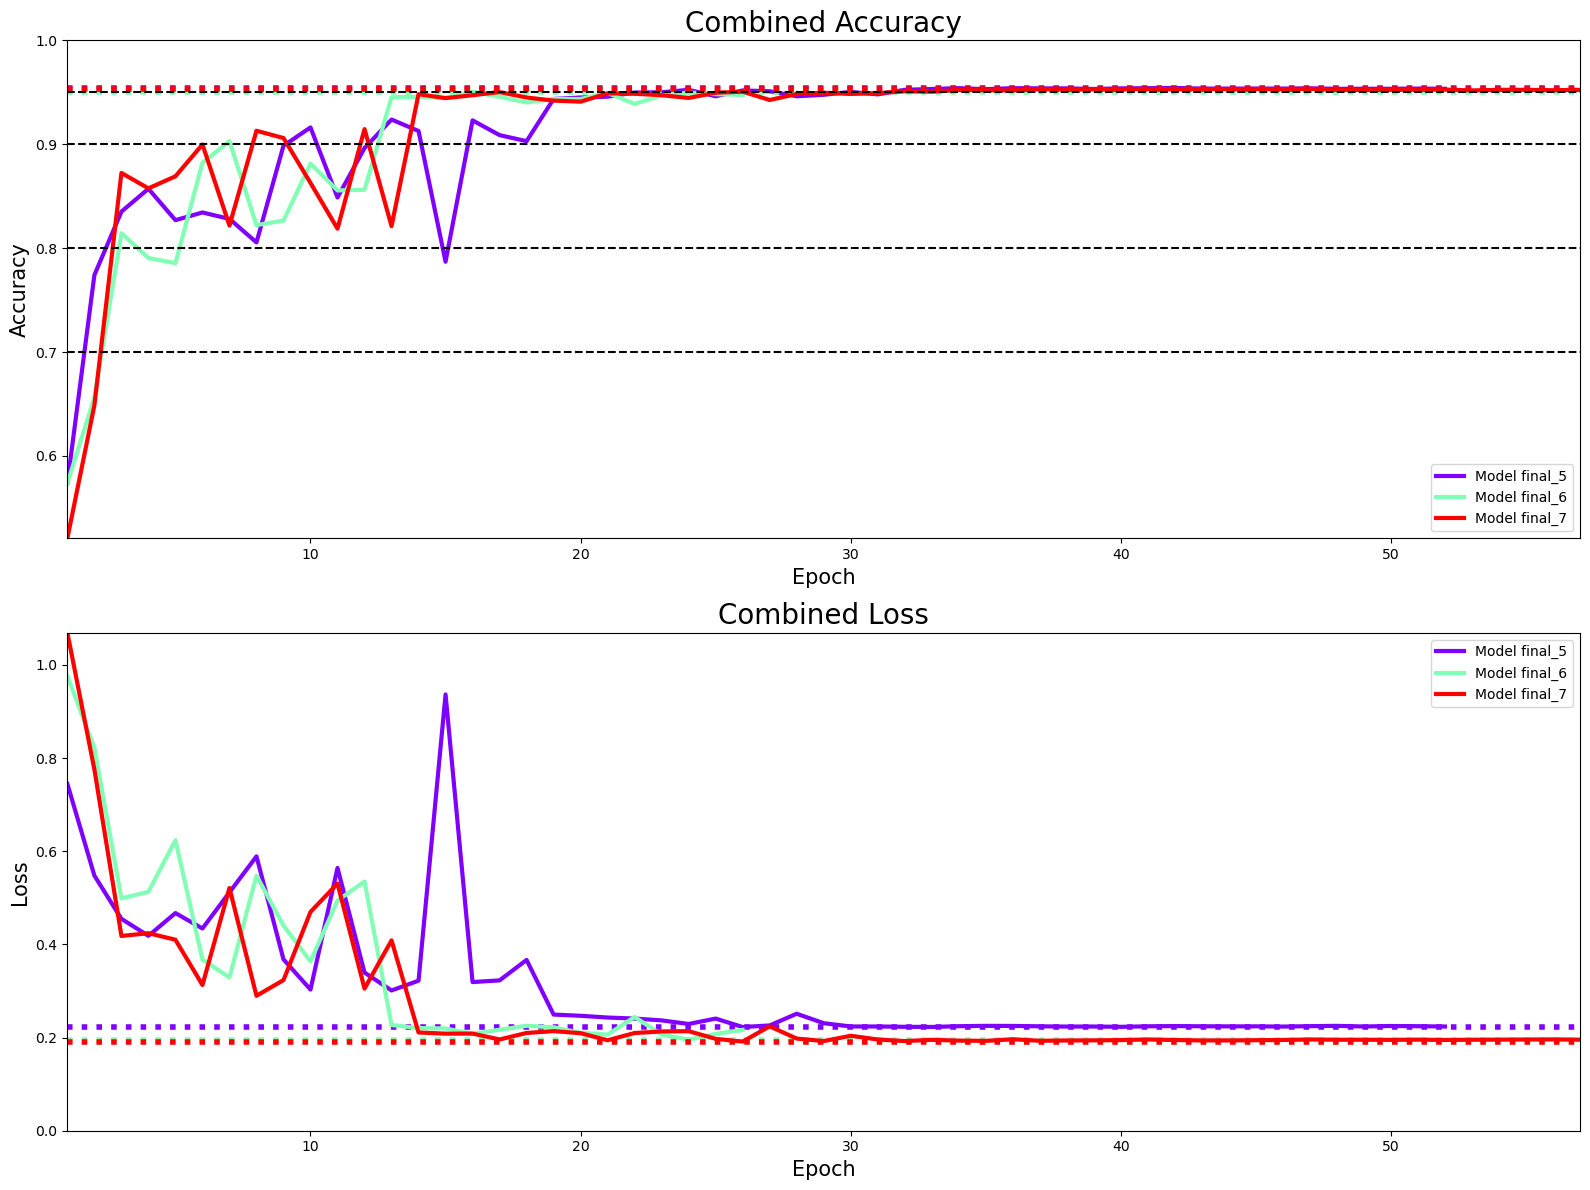

In [80]:
plot_combined_histories(models[12:], history_folder='history_567', charts_folder='charts_567', name='final')

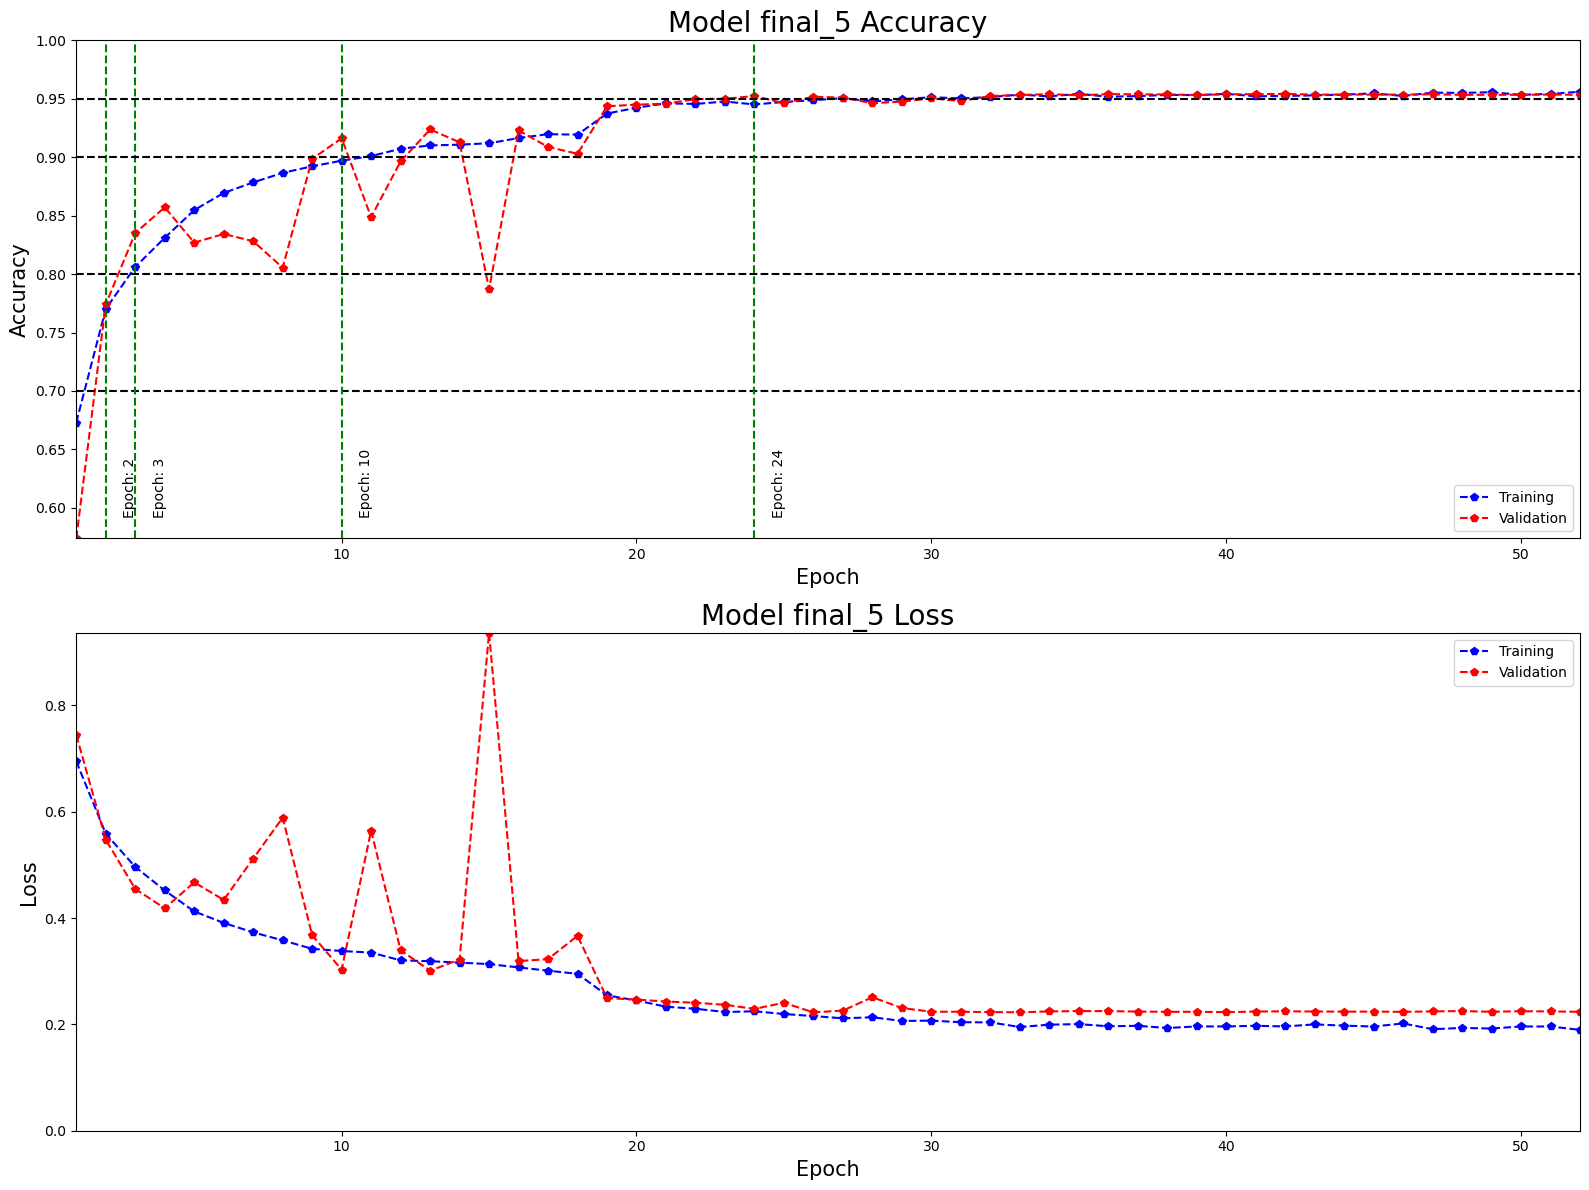

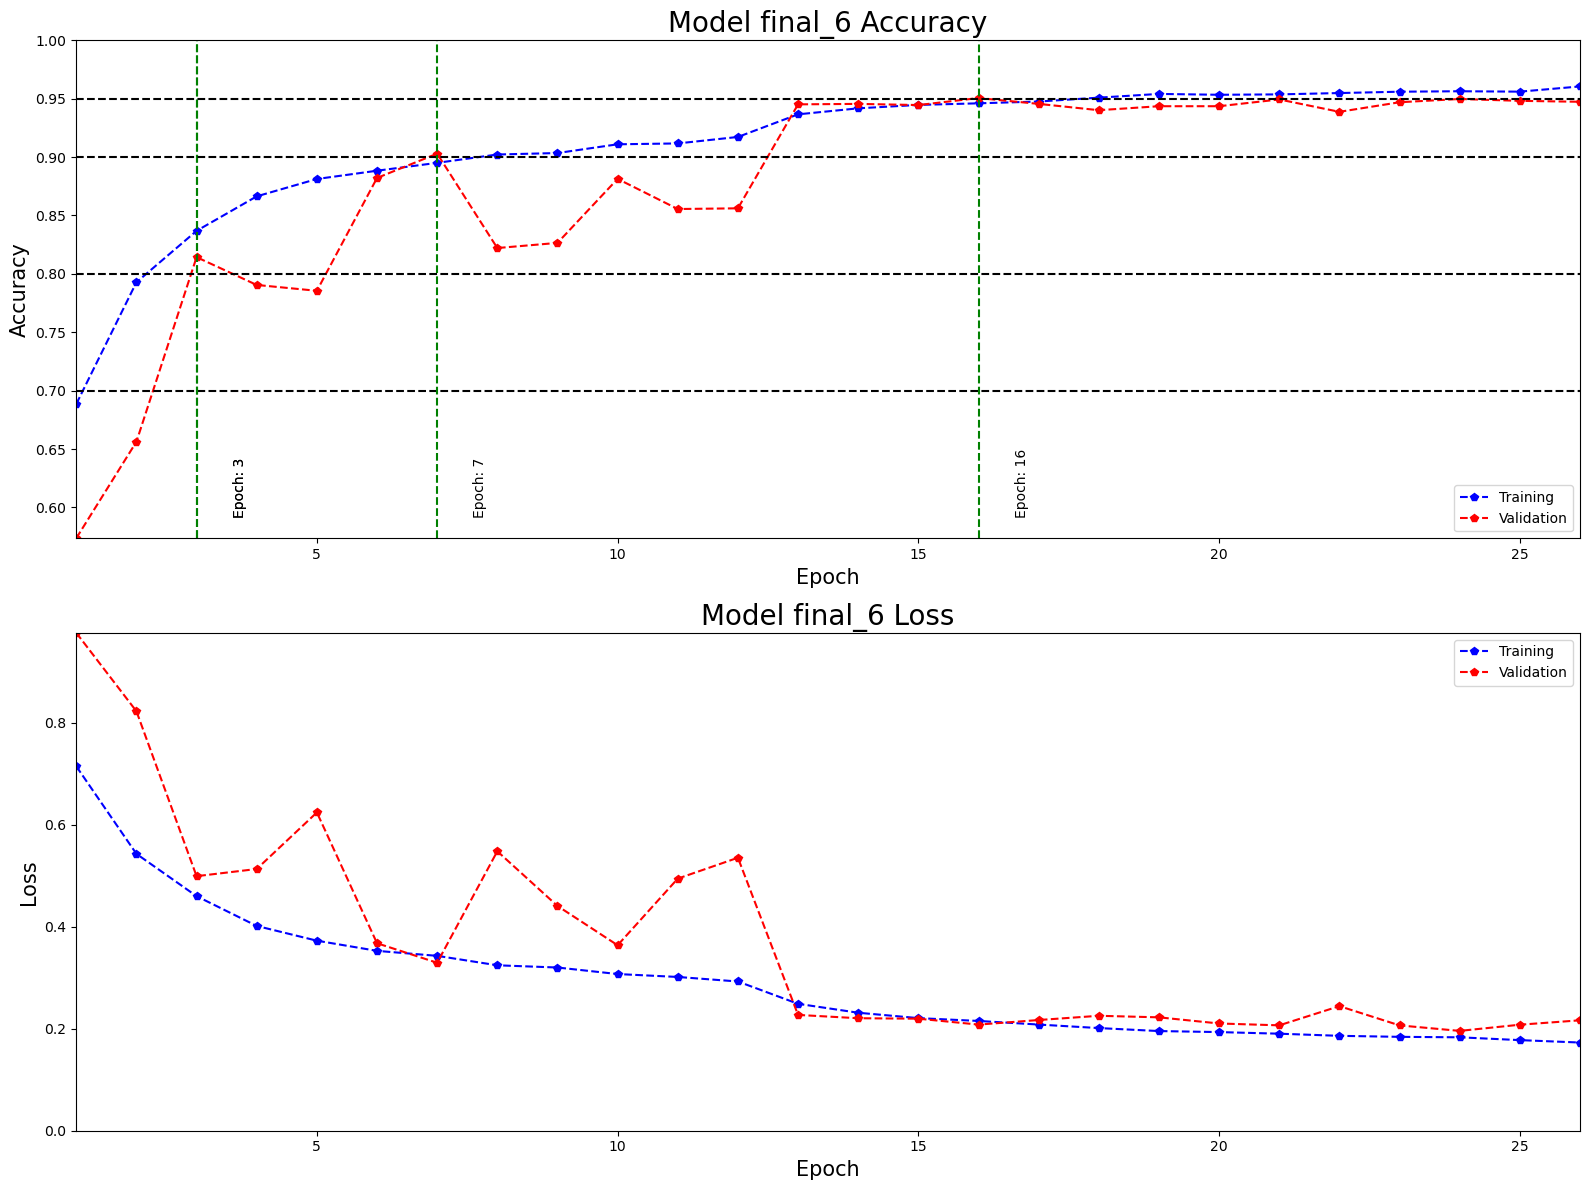

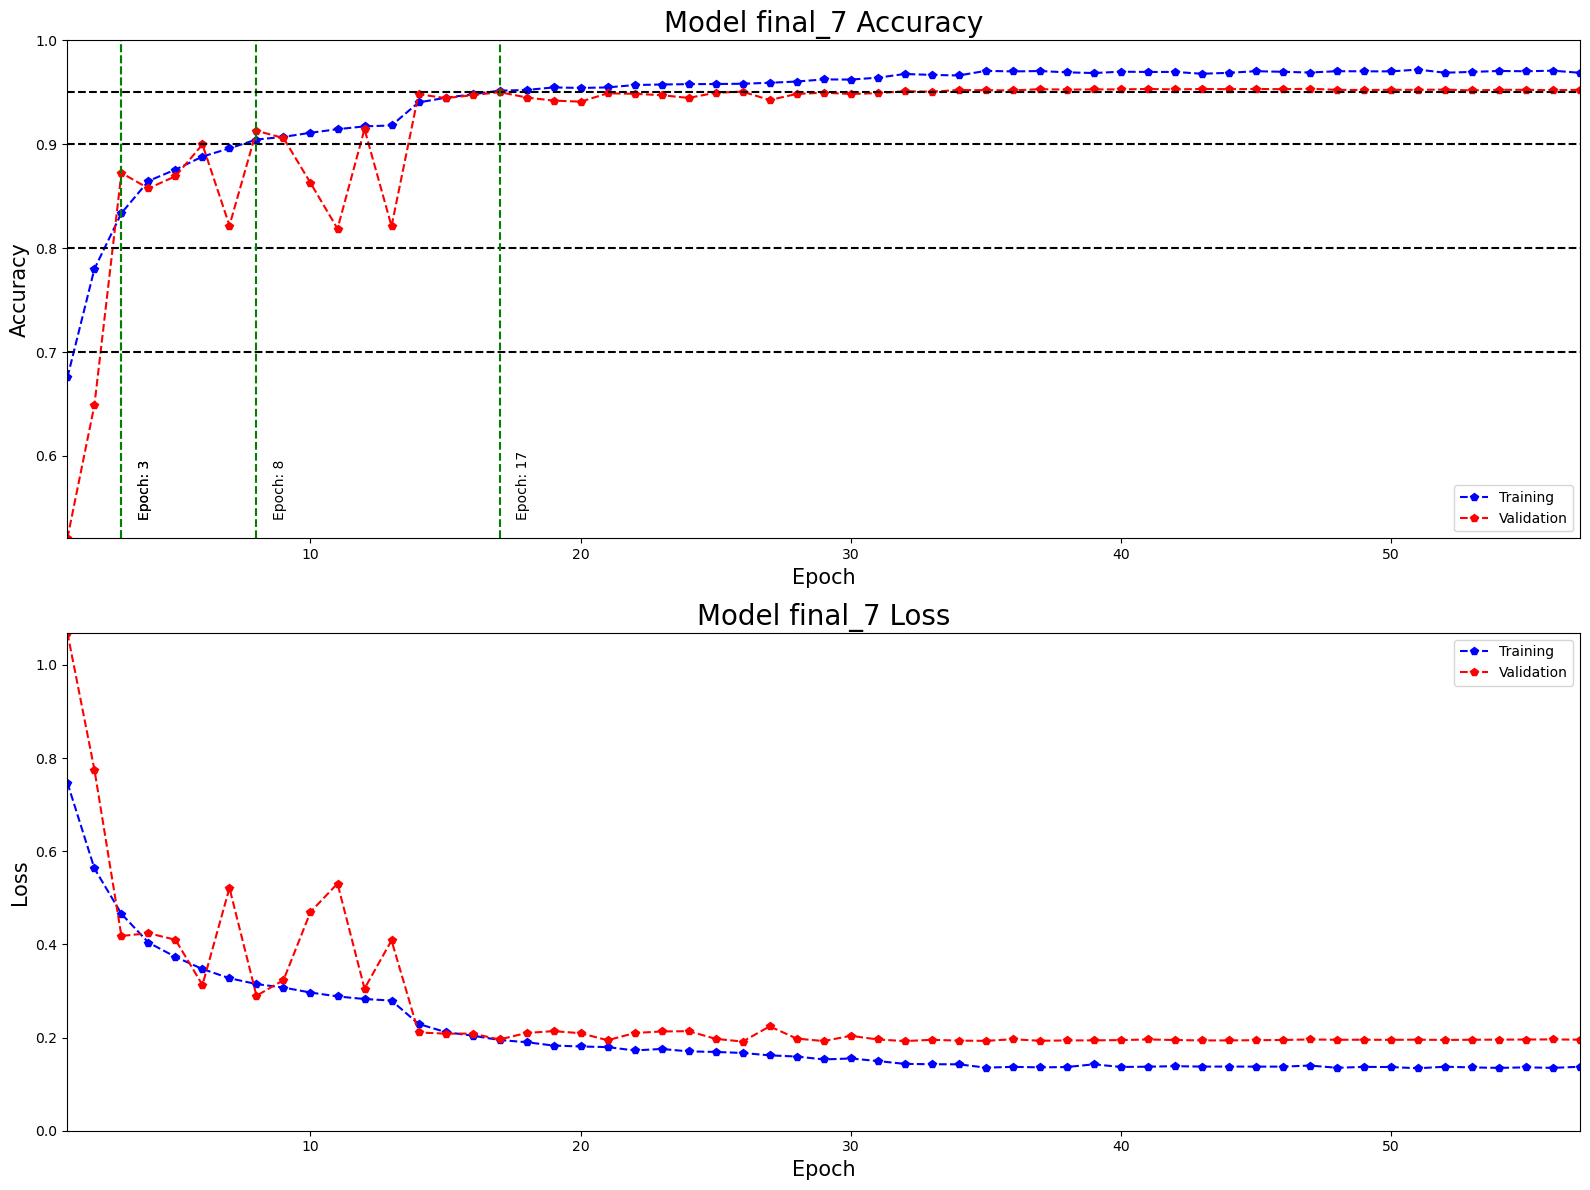

In [81]:
plot_individual_histories(models[12:])

##### Model z 5 warstwami wskazuje na lekki underfitting, a z 7 odwrotnie na overfitting. Model Final_6 uczy się najszybsciej i wydaje się najrozsądniejszym wyborem do dalszych testów. Z tych powodów wybieram go do dalszych modyfikacji. 

### Dodanie dodatkowej warstwy Dense

In [13]:
densefinal6 = Sequential()

# Blok 1
densefinal6.add(Conv2D(16, (3,3), 
                     padding='same',
                     kernel_regularizer=l2(1e-4),
                     use_bias=False,
                     input_shape=(150, 150, 3)))
densefinal6.add(BatchNormalization())
densefinal6.add(Activation('relu'))
densefinal6.add(MaxPooling2D(pool_size=(2, 2)))

# Blok 2
densefinal6.add(Conv2D(32, (3,3), 
                     padding='same',
                     kernel_regularizer=l2(1e-4),
                     use_bias=False))
densefinal6.add(BatchNormalization())
densefinal6.add(Activation('relu'))
densefinal6.add(MaxPooling2D(pool_size=(2, 2)))

# Blok 3
densefinal6.add(Conv2D(64, (3,3), 
                     padding='same',
                     kernel_regularizer=l2(1e-4),
                     use_bias=False))
densefinal6.add(BatchNormalization())
densefinal6.add(Activation('relu'))
densefinal6.add(MaxPooling2D(pool_size=(2, 2)))

# Blok 4
densefinal6.add(Conv2D(128, (3,3), 
                     padding='same',
                     kernel_regularizer=l2(1e-4),
                     use_bias=False))
densefinal6.add(BatchNormalization())
densefinal6.add(Activation('relu'))
densefinal6.add(MaxPooling2D(pool_size=(2, 2)))

# Blok 5
densefinal6.add(Conv2D(256, (3,3), 
                     padding='same',
                     kernel_regularizer=l2(1e-4),
                     use_bias=False))
densefinal6.add(BatchNormalization())
densefinal6.add(Activation('relu'))
densefinal6.add(MaxPooling2D(pool_size=(2, 2)))

# Blok 6
densefinal6.add(Conv2D(512, (3,3), 
                     padding='same',
                     kernel_regularizer=l2(1e-4),
                     use_bias=False))
densefinal6.add(BatchNormalization())
densefinal6.add(Activation('relu'))
densefinal6.add(MaxPooling2D(pool_size=(2, 2)))

# Klasyfikator
densefinal6.add(Flatten())
densefinal6.add(Dropout(0.5))

densefinal6.add(Dense(256,
                kernel_regularizer=l2(1e-4),
                use_bias=False))
densefinal6.add(BatchNormalization())
densefinal6.add(Activation('relu'))
densefinal6.add(Dropout(0.5))

densefinal6.add(Dense(128,
                kernel_regularizer=l2(1e-4),
                use_bias=False))
densefinal6.add(BatchNormalization())
densefinal6.add(Activation('relu'))
densefinal6.add(Dropout(0.5))

densefinal6.add(Dense(1, activation='sigmoid'))

densefinal6.compile(loss='binary_crossentropy',
               optimizer=RMSprop(learning_rate=1e-3),
               metrics=['accuracy'])

densefinal6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      432       
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 16)     64        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 150, 150, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4608      
                                                                 
 batch_normalization_1 (Batc  (None, 75, 75, 32)       1

In [14]:
fit_and_save_model(densefinal6,
                   train_set=aug_generator,
                   epochs=1000,
                   callbacks=callbacks,
                   model_name='densefinal_6')

Epoch 1/1000
144/274 [==============>...............] - ETA: 31s - loss: 0.8307 - accuracy: 0.6146

c:\Users\Urban\.conda\envs\kodilla-edu\lib\site-packages\PIL\TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))


274/274 [==============================] - 79s 273ms/step - loss: 0.7746 - accuracy: 0.6619 - val_loss: 0.9358 - val_accuracy: 0.5256 - lr: 0.0010
Epoch 2/1000
274/274 [==============================] - 72s 263ms/step - loss: 0.6256 - accuracy: 0.7713 - val_loss: 0.8286 - val_accuracy: 0.7115 - lr: 0.0010
Epoch 3/1000
274/274 [==============================] - 73s 265ms/step - loss: 0.5280 - accuracy: 0.8192 - val_loss: 0.6665 - val_accuracy: 0.8101 - lr: 0.0010
Epoch 4/1000
274/274 [==============================] - 72s 264ms/step - loss: 0.4586 - accuracy: 0.8492 - val_loss: 0.4332 - val_accuracy: 0.8651 - lr: 0.0010
Epoch 5/1000
274/274 [==============================] - 72s 262ms/step - loss: 0.4095 - accuracy: 0.8692 - val_loss: 0.6569 - val_accuracy: 0.7577 - lr: 0.0010
Epoch 6/1000
274/274 [==============================] - 72s 262ms/step - loss: 0.3798 - accuracy: 0.8834 - val_loss: 0.5110 - val_accuracy: 0.8039 - lr: 0.0010
Epoch 7/1000
274/274 [==============================]

### Podwojenie warstw Conv2D

In [15]:
doubledensefinal6 = Sequential()

# Blok 1
doubledensefinal6.add(Conv2D(16, (3,3), 
                     padding='same',
                     kernel_regularizer=l2(1e-4),
                     use_bias=False,
                     input_shape=(150, 150, 3)))
doubledensefinal6.add(BatchNormalization())
doubledensefinal6.add(Activation('relu'))
doubledensefinal6.add(Conv2D(16, (3,3), 
                     padding='same',
                     kernel_regularizer=l2(1e-4),
                     use_bias=False,
                     input_shape=(150, 150, 3)))
doubledensefinal6.add(BatchNormalization())
doubledensefinal6.add(Activation('relu'))
doubledensefinal6.add(MaxPooling2D(pool_size=(2, 2)))

# Blok 2
doubledensefinal6.add(Conv2D(32, (3,3), 
                     padding='same',
                     kernel_regularizer=l2(1e-4),
                     use_bias=False))
doubledensefinal6.add(BatchNormalization())
doubledensefinal6.add(Activation('relu'))
doubledensefinal6.add(Conv2D(32, (3,3), 
                     padding='same',
                     kernel_regularizer=l2(1e-4),
                     use_bias=False))
doubledensefinal6.add(BatchNormalization())
doubledensefinal6.add(Activation('relu'))
doubledensefinal6.add(MaxPooling2D(pool_size=(2, 2)))

# Blok 3
doubledensefinal6.add(Conv2D(64, (3,3), 
                     padding='same',
                     kernel_regularizer=l2(1e-4),
                     use_bias=False))
doubledensefinal6.add(BatchNormalization())
doubledensefinal6.add(Activation('relu'))
doubledensefinal6.add(Conv2D(64, (3,3), 
                     padding='same',
                     kernel_regularizer=l2(1e-4),
                     use_bias=False))
doubledensefinal6.add(BatchNormalization())
doubledensefinal6.add(Activation('relu'))
doubledensefinal6.add(MaxPooling2D(pool_size=(2, 2)))

# Blok 4
doubledensefinal6.add(Conv2D(128, (3,3), 
                     padding='same',
                     kernel_regularizer=l2(1e-4),
                     use_bias=False))
doubledensefinal6.add(BatchNormalization())
doubledensefinal6.add(Activation('relu'))
doubledensefinal6.add(Conv2D(128, (3,3), 
                     padding='same',
                     kernel_regularizer=l2(1e-4),
                     use_bias=False))
doubledensefinal6.add(BatchNormalization())
doubledensefinal6.add(Activation('relu'))
doubledensefinal6.add(MaxPooling2D(pool_size=(2, 2)))

# Blok 5
doubledensefinal6.add(Conv2D(256, (3,3), 
                     padding='same',
                     kernel_regularizer=l2(1e-4),
                     use_bias=False))
doubledensefinal6.add(BatchNormalization())
doubledensefinal6.add(Activation('relu'))
doubledensefinal6.add(Conv2D(256, (3,3), 
                     padding='same',
                     kernel_regularizer=l2(1e-4),
                     use_bias=False))
doubledensefinal6.add(BatchNormalization())
doubledensefinal6.add(Activation('relu'))
doubledensefinal6.add(MaxPooling2D(pool_size=(2, 2)))

# Blok 6
doubledensefinal6.add(Conv2D(512, (3,3), 
                     padding='same',
                     kernel_regularizer=l2(1e-4),
                     use_bias=False))
doubledensefinal6.add(BatchNormalization())
doubledensefinal6.add(Activation('relu'))
doubledensefinal6.add(Conv2D(512, (3,3), 
                     padding='same',
                     kernel_regularizer=l2(1e-4),
                     use_bias=False))
doubledensefinal6.add(BatchNormalization())
doubledensefinal6.add(Activation('relu'))
doubledensefinal6.add(MaxPooling2D(pool_size=(2, 2)))

# Klasyfikator
doubledensefinal6.add(Flatten())
doubledensefinal6.add(Dropout(0.5))

doubledensefinal6.add(Dense(256,
                kernel_regularizer=l2(1e-4),
                use_bias=False))
doubledensefinal6.add(BatchNormalization())
doubledensefinal6.add(Activation('relu'))
doubledensefinal6.add(Dropout(0.5))

doubledensefinal6.add(Dense(128,
                kernel_regularizer=l2(1e-4),
                use_bias=False))
doubledensefinal6.add(BatchNormalization())
doubledensefinal6.add(Activation('relu'))
doubledensefinal6.add(Dropout(0.5))

doubledensefinal6.add(Dense(1, activation='sigmoid'))

doubledensefinal6.compile(loss='binary_crossentropy',
               optimizer=RMSprop(learning_rate=1e-3),
               metrics=['accuracy'])

doubledensefinal6.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 16)      432       
                                                                 
 batch_normalization_8 (Batc  (None, 150, 150, 16)     64        
 hNormalization)                                                 
                                                                 
 activation_8 (Activation)   (None, 150, 150, 16)      0         
                                                                 
 conv2d_7 (Conv2D)           (None, 150, 150, 16)      2304      
                                                                 
 batch_normalization_9 (Batc  (None, 150, 150, 16)     64        
 hNormalization)                                                 
                                                                 
 activation_9 (Activation)   (None, 150, 150, 16)     

In [16]:
fit_and_save_model(doubledensefinal6,
                   train_set=aug_generator,
                   epochs=1000,
                   callbacks=callbacks,
                   model_name='doubledensefinal_6')

Epoch 1/1000
274/274 [==============================] - 72s 255ms/step - loss: 0.9268 - accuracy: 0.5621 - val_loss: 0.8779 - val_accuracy: 0.5746 - lr: 0.0010
Epoch 2/1000
274/274 [==============================] - 70s 254ms/step - loss: 0.7356 - accuracy: 0.6641 - val_loss: 0.7153 - val_accuracy: 0.6597 - lr: 0.0010
Epoch 3/1000
274/274 [==============================] - 70s 256ms/step - loss: 0.6370 - accuracy: 0.7314 - val_loss: 0.7415 - val_accuracy: 0.6579 - lr: 0.0010
Epoch 4/1000
274/274 [==============================] - 72s 262ms/step - loss: 0.5416 - accuracy: 0.7896 - val_loss: 0.5836 - val_accuracy: 0.7611 - lr: 0.0010
Epoch 5/1000
274/274 [==============================] - 70s 254ms/step - loss: 0.4503 - accuracy: 0.8368 - val_loss: 0.5445 - val_accuracy: 0.8009 - lr: 0.0010
Epoch 6/1000
274/274 [==============================] - 70s 254ms/step - loss: 0.3992 - accuracy: 0.8614 - val_loss: 0.3399 - val_accuracy: 0.8958 - lr: 0.0010
Epoch 7/1000
274/274 [==================

### Zmiana Flatten() na GlobalAvaregePooling2D

In [17]:
doubledensegap6 = Sequential()

# Blok 1
doubledensegap6.add(Conv2D(16, (3,3), 
                     padding='same',
                     kernel_regularizer=l2(1e-4),
                     use_bias=False,
                     input_shape=(150, 150, 3)))
doubledensegap6.add(BatchNormalization())
doubledensegap6.add(Activation('relu'))
doubledensegap6.add(Conv2D(16, (3,3), 
                     padding='same',
                     kernel_regularizer=l2(1e-4),
                     use_bias=False,
                     input_shape=(150, 150, 3)))
doubledensegap6.add(BatchNormalization())
doubledensegap6.add(Activation('relu'))
doubledensegap6.add(MaxPooling2D(pool_size=(2, 2)))

# Blok 2
doubledensegap6.add(Conv2D(32, (3,3), 
                     padding='same',
                     kernel_regularizer=l2(1e-4),
                     use_bias=False))
doubledensegap6.add(BatchNormalization())
doubledensegap6.add(Activation('relu'))
doubledensegap6.add(Conv2D(32, (3,3), 
                     padding='same',
                     kernel_regularizer=l2(1e-4),
                     use_bias=False))
doubledensegap6.add(BatchNormalization())
doubledensegap6.add(Activation('relu'))
doubledensegap6.add(MaxPooling2D(pool_size=(2, 2)))

# Blok 3
doubledensegap6.add(Conv2D(64, (3,3), 
                     padding='same',
                     kernel_regularizer=l2(1e-4),
                     use_bias=False))
doubledensegap6.add(BatchNormalization())
doubledensegap6.add(Activation('relu'))
doubledensegap6.add(Conv2D(64, (3,3), 
                     padding='same',
                     kernel_regularizer=l2(1e-4),
                     use_bias=False))
doubledensegap6.add(BatchNormalization())
doubledensegap6.add(Activation('relu'))
doubledensegap6.add(MaxPooling2D(pool_size=(2, 2)))

# Blok 4
doubledensegap6.add(Conv2D(128, (3,3), 
                     padding='same',
                     kernel_regularizer=l2(1e-4),
                     use_bias=False))
doubledensegap6.add(BatchNormalization())
doubledensegap6.add(Activation('relu'))
doubledensegap6.add(Conv2D(128, (3,3), 
                     padding='same',
                     kernel_regularizer=l2(1e-4),
                     use_bias=False))
doubledensegap6.add(BatchNormalization())
doubledensegap6.add(Activation('relu'))
doubledensegap6.add(MaxPooling2D(pool_size=(2, 2)))

# Blok 5
doubledensegap6.add(Conv2D(256, (3,3), 
                     padding='same',
                     kernel_regularizer=l2(1e-4),
                     use_bias=False))
doubledensegap6.add(BatchNormalization())
doubledensegap6.add(Activation('relu'))
doubledensegap6.add(Conv2D(256, (3,3), 
                     padding='same',
                     kernel_regularizer=l2(1e-4),
                     use_bias=False))
doubledensegap6.add(BatchNormalization())
doubledensegap6.add(Activation('relu'))
doubledensegap6.add(MaxPooling2D(pool_size=(2, 2)))

# Blok 6
doubledensegap6.add(Conv2D(512, (3,3), 
                     padding='same',
                     kernel_regularizer=l2(1e-4),
                     use_bias=False))
doubledensegap6.add(BatchNormalization())
doubledensegap6.add(Activation('relu'))
doubledensegap6.add(Conv2D(512, (3,3), 
                     padding='same',
                     kernel_regularizer=l2(1e-4),
                     use_bias=False))
doubledensegap6.add(BatchNormalization())
doubledensegap6.add(Activation('relu'))
doubledensegap6.add(MaxPooling2D(pool_size=(2, 2)))

# Klasyfikator
doubledensegap6.add(GlobalAveragePooling2D())
doubledensegap6.add(Dropout(0.5))

doubledensegap6.add(Dense(256,
                kernel_regularizer=l2(1e-4),
                use_bias=False))
doubledensegap6.add(BatchNormalization())
doubledensegap6.add(Activation('relu'))
doubledensegap6.add(Dropout(0.5))

doubledensegap6.add(Dense(128,
                kernel_regularizer=l2(1e-4),
                use_bias=False))
doubledensegap6.add(BatchNormalization())
doubledensegap6.add(Activation('relu'))
doubledensegap6.add(Dropout(0.5))

doubledensegap6.add(Dense(1, activation='sigmoid'))

doubledensegap6.compile(loss='binary_crossentropy',
               optimizer=RMSprop(learning_rate=1e-3),
               metrics=['accuracy'])

doubledensegap6.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 150, 150, 16)      432       
                                                                 
 batch_normalization_22 (Bat  (None, 150, 150, 16)     64        
 chNormalization)                                                
                                                                 
 activation_22 (Activation)  (None, 150, 150, 16)      0         
                                                                 
 conv2d_19 (Conv2D)          (None, 150, 150, 16)      2304      
                                                                 
 batch_normalization_23 (Bat  (None, 150, 150, 16)     64        
 chNormalization)                                                
                                                                 
 activation_23 (Activation)  (None, 150, 150, 16)     

In [18]:
fit_and_save_model(doubledensegap6,
                   train_set=aug_generator,
                   epochs=1000,
                   callbacks=callbacks,
                   model_name='doubledensegap_6')

Epoch 1/1000
274/274 [==============================] - 73s 261ms/step - loss: 0.9156 - accuracy: 0.5398 - val_loss: 0.9126 - val_accuracy: 0.5040 - lr: 0.0010
Epoch 2/1000
274/274 [==============================] - 71s 259ms/step - loss: 0.7589 - accuracy: 0.5688 - val_loss: 0.7746 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/1000
274/274 [==============================] - 71s 260ms/step - loss: 0.7211 - accuracy: 0.5978 - val_loss: 0.7751 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/1000
274/274 [==============================] - 72s 263ms/step - loss: 0.6735 - accuracy: 0.6534 - val_loss: 0.8181 - val_accuracy: 0.6228 - lr: 0.0010
Epoch 5/1000
274/274 [==============================] - 70s 257ms/step - loss: 0.6222 - accuracy: 0.7085 - val_loss: 0.7004 - val_accuracy: 0.6082 - lr: 0.0010
Epoch 6/1000
274/274 [==============================] - 70s 254ms/step - loss: 0.5546 - accuracy: 0.7615 - val_loss: 0.5168 - val_accuracy: 0.7735 - lr: 0.0010
Epoch 7/1000
274/274 [==================

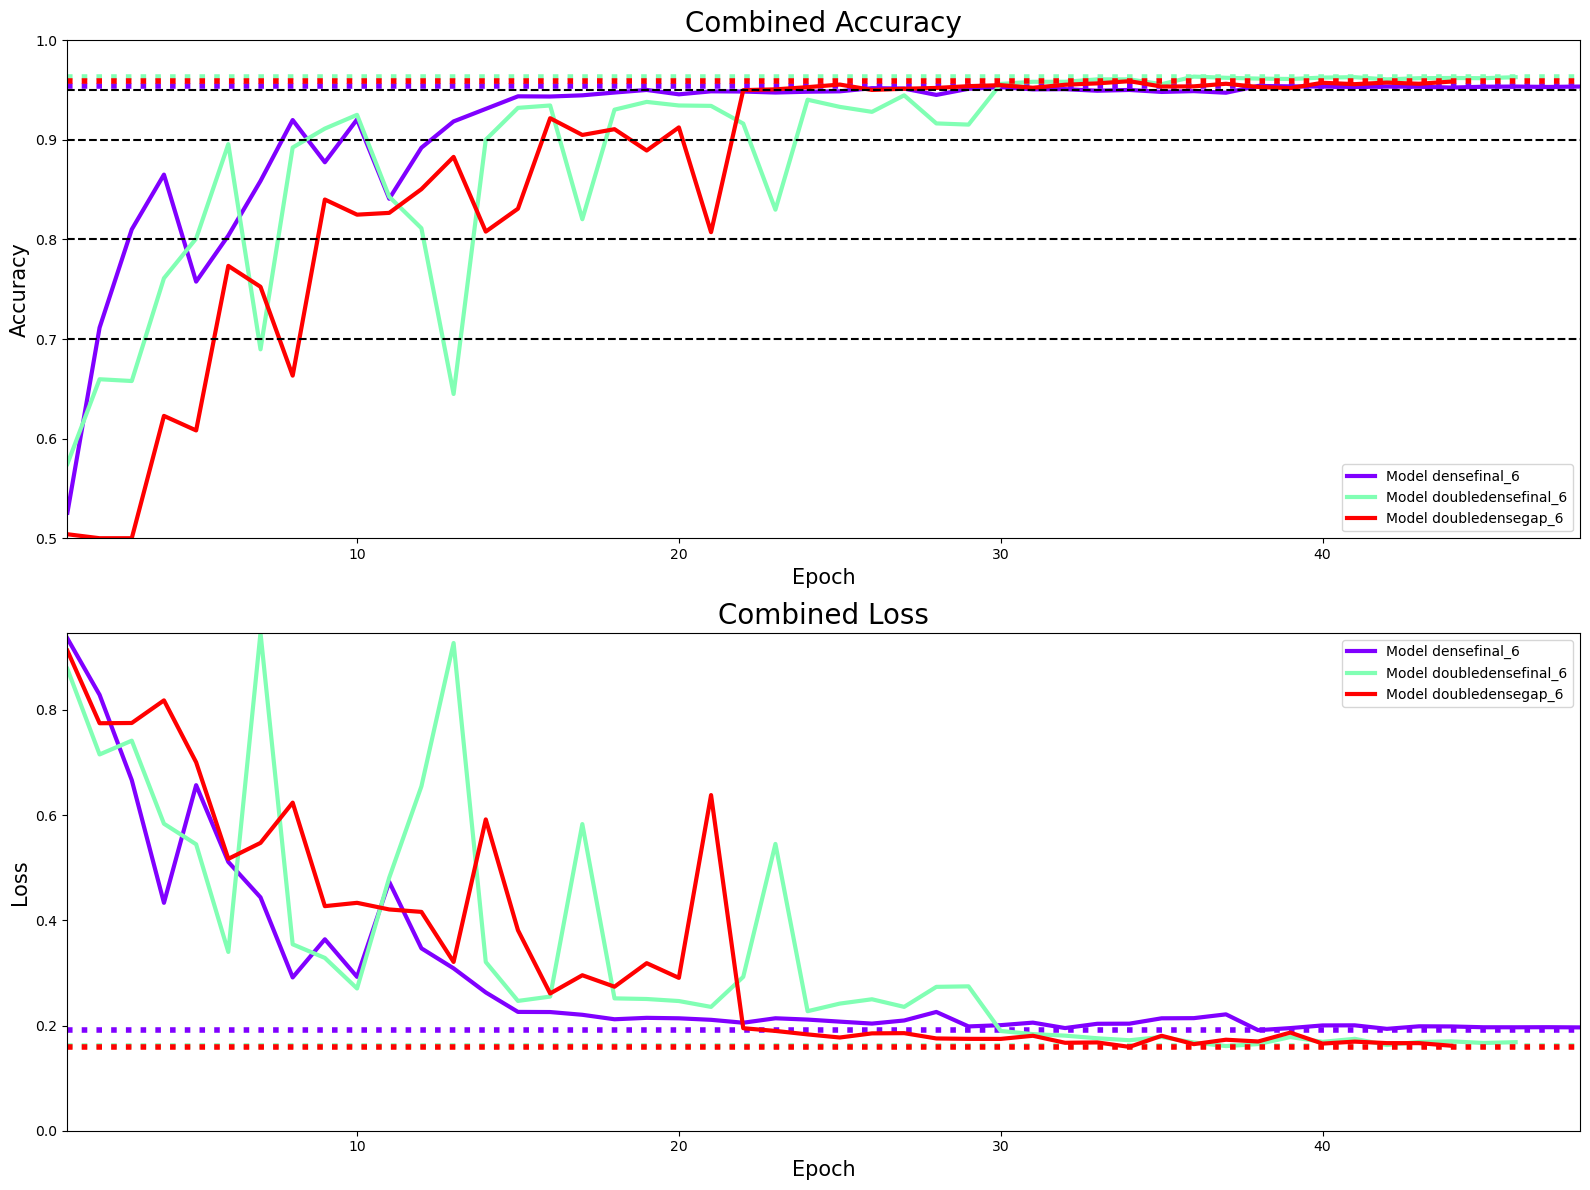

In [20]:
plot_combined_histories(models, history_folder='history_567', charts_folder='charts_567', name='final6')


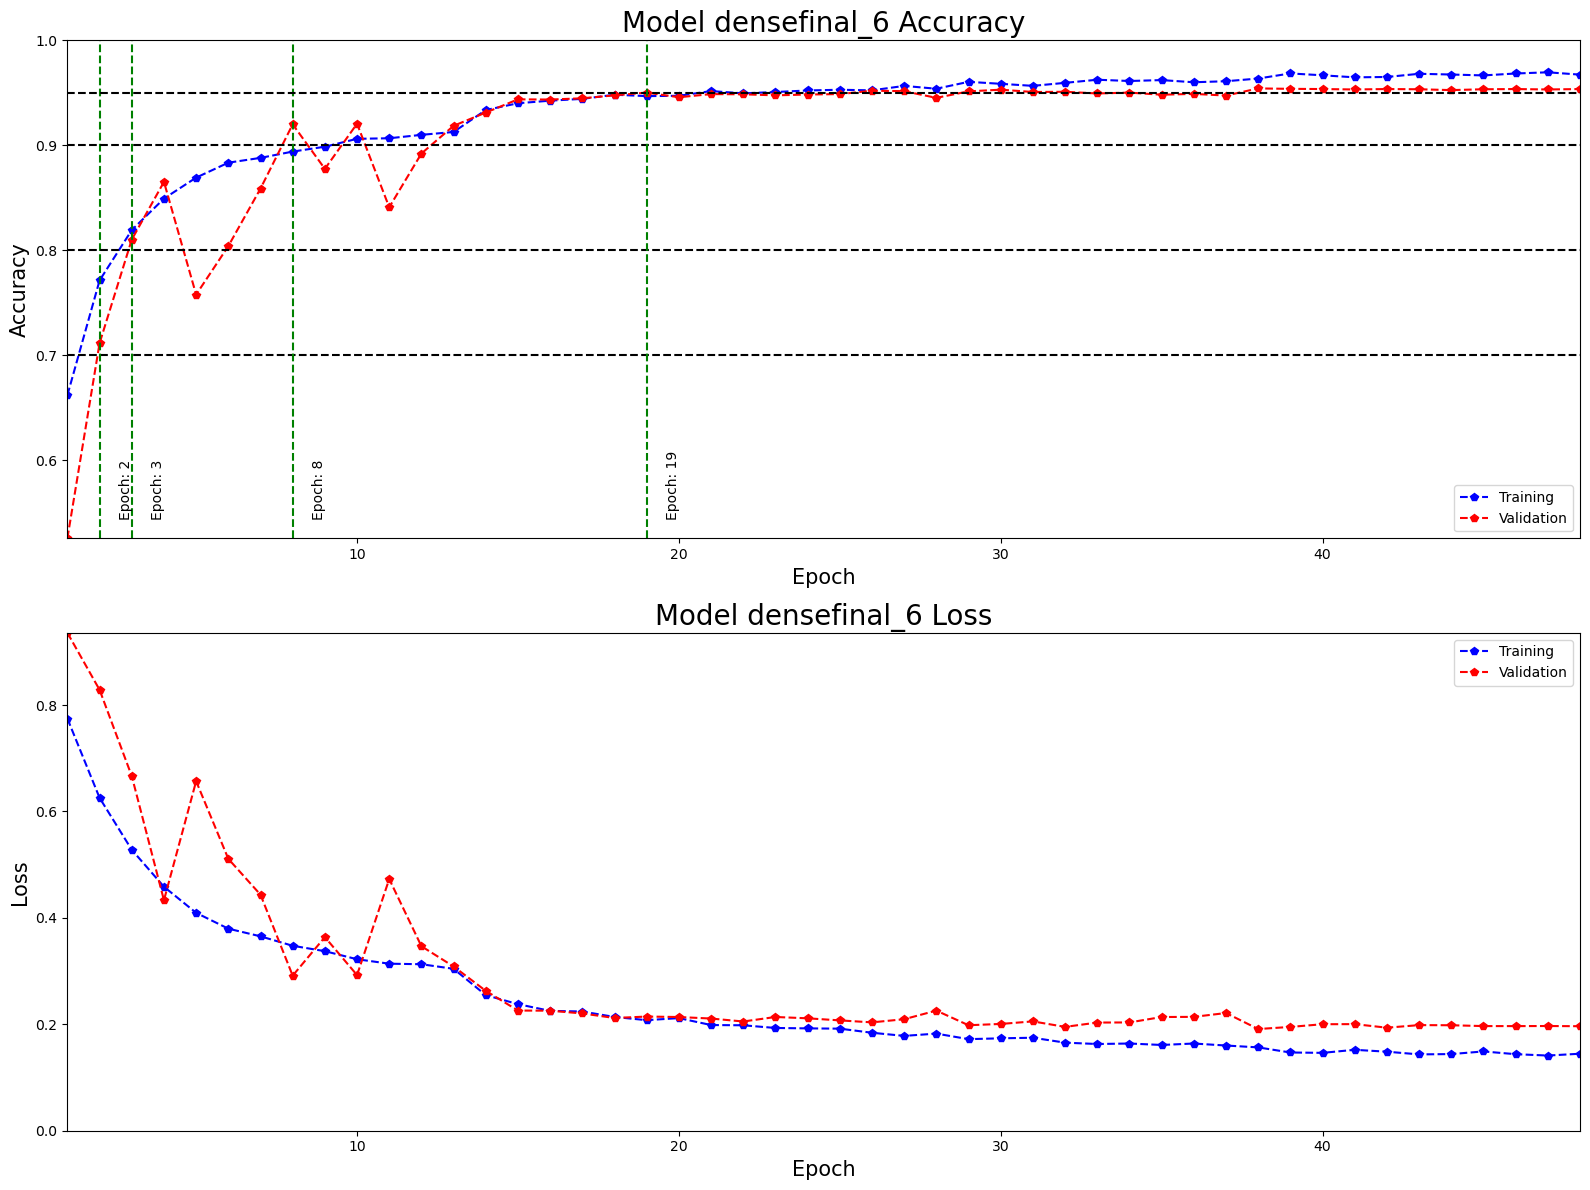

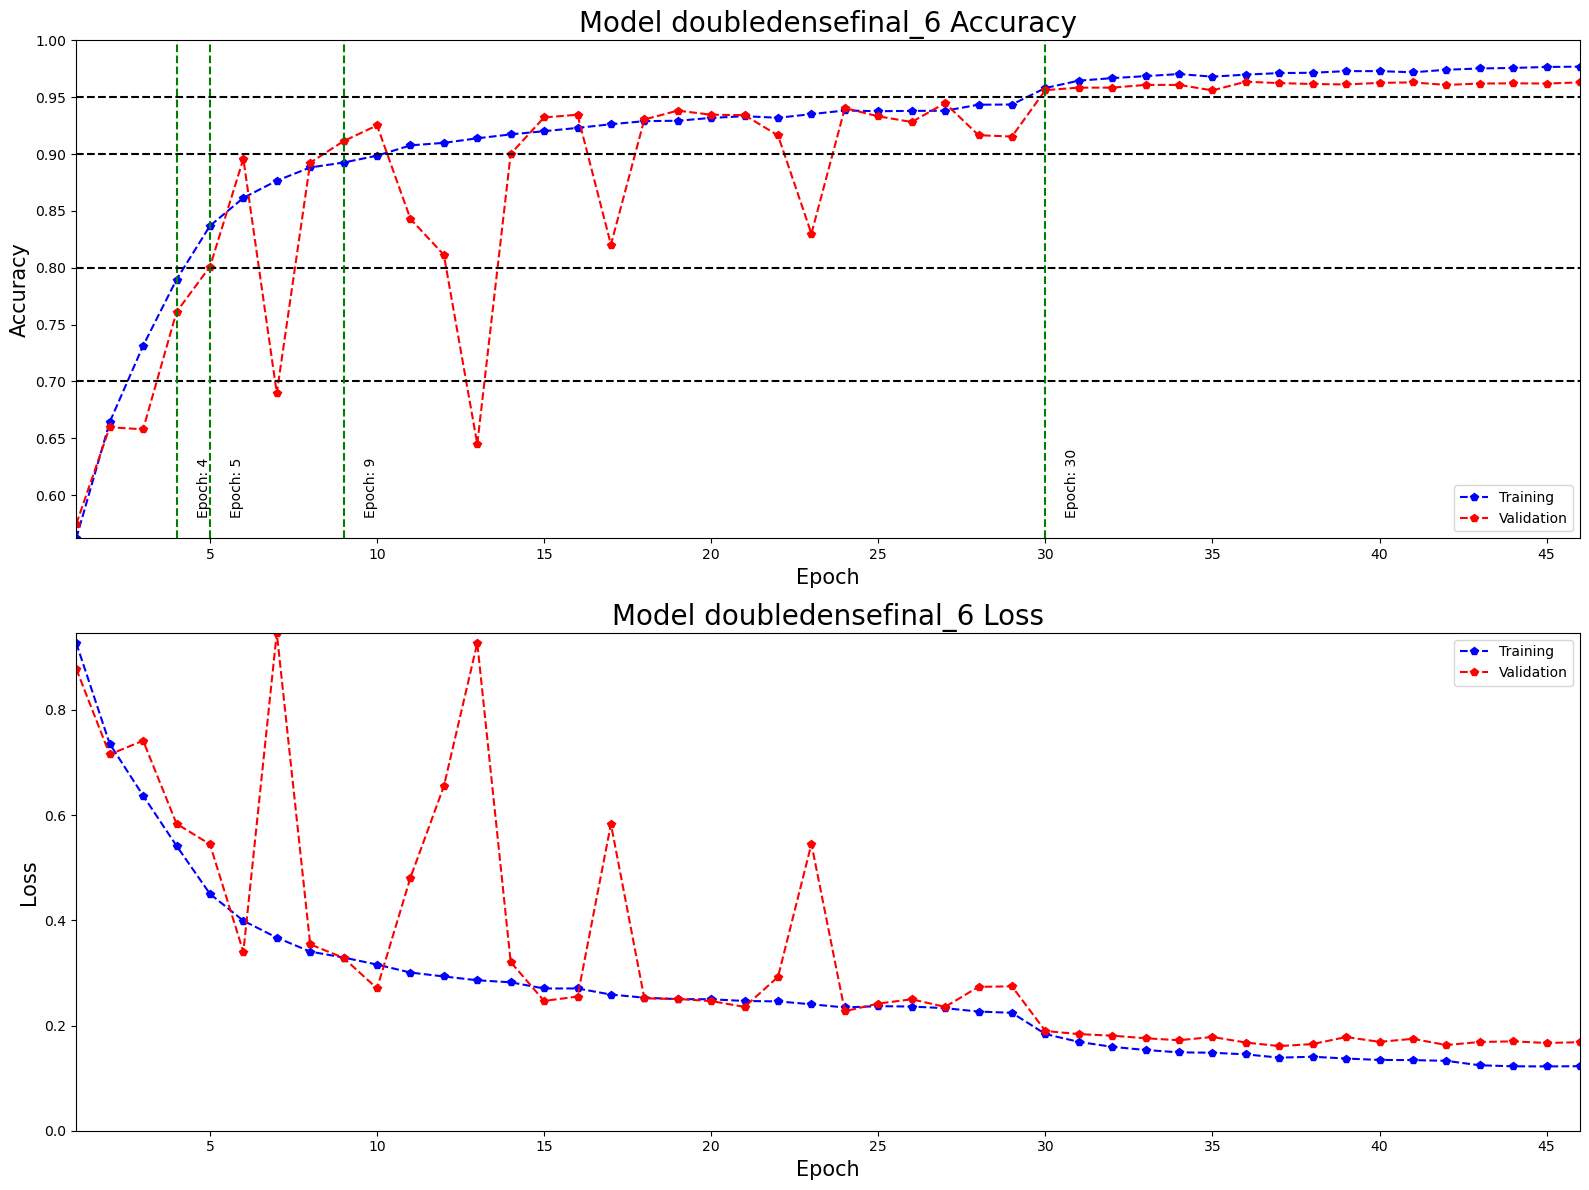

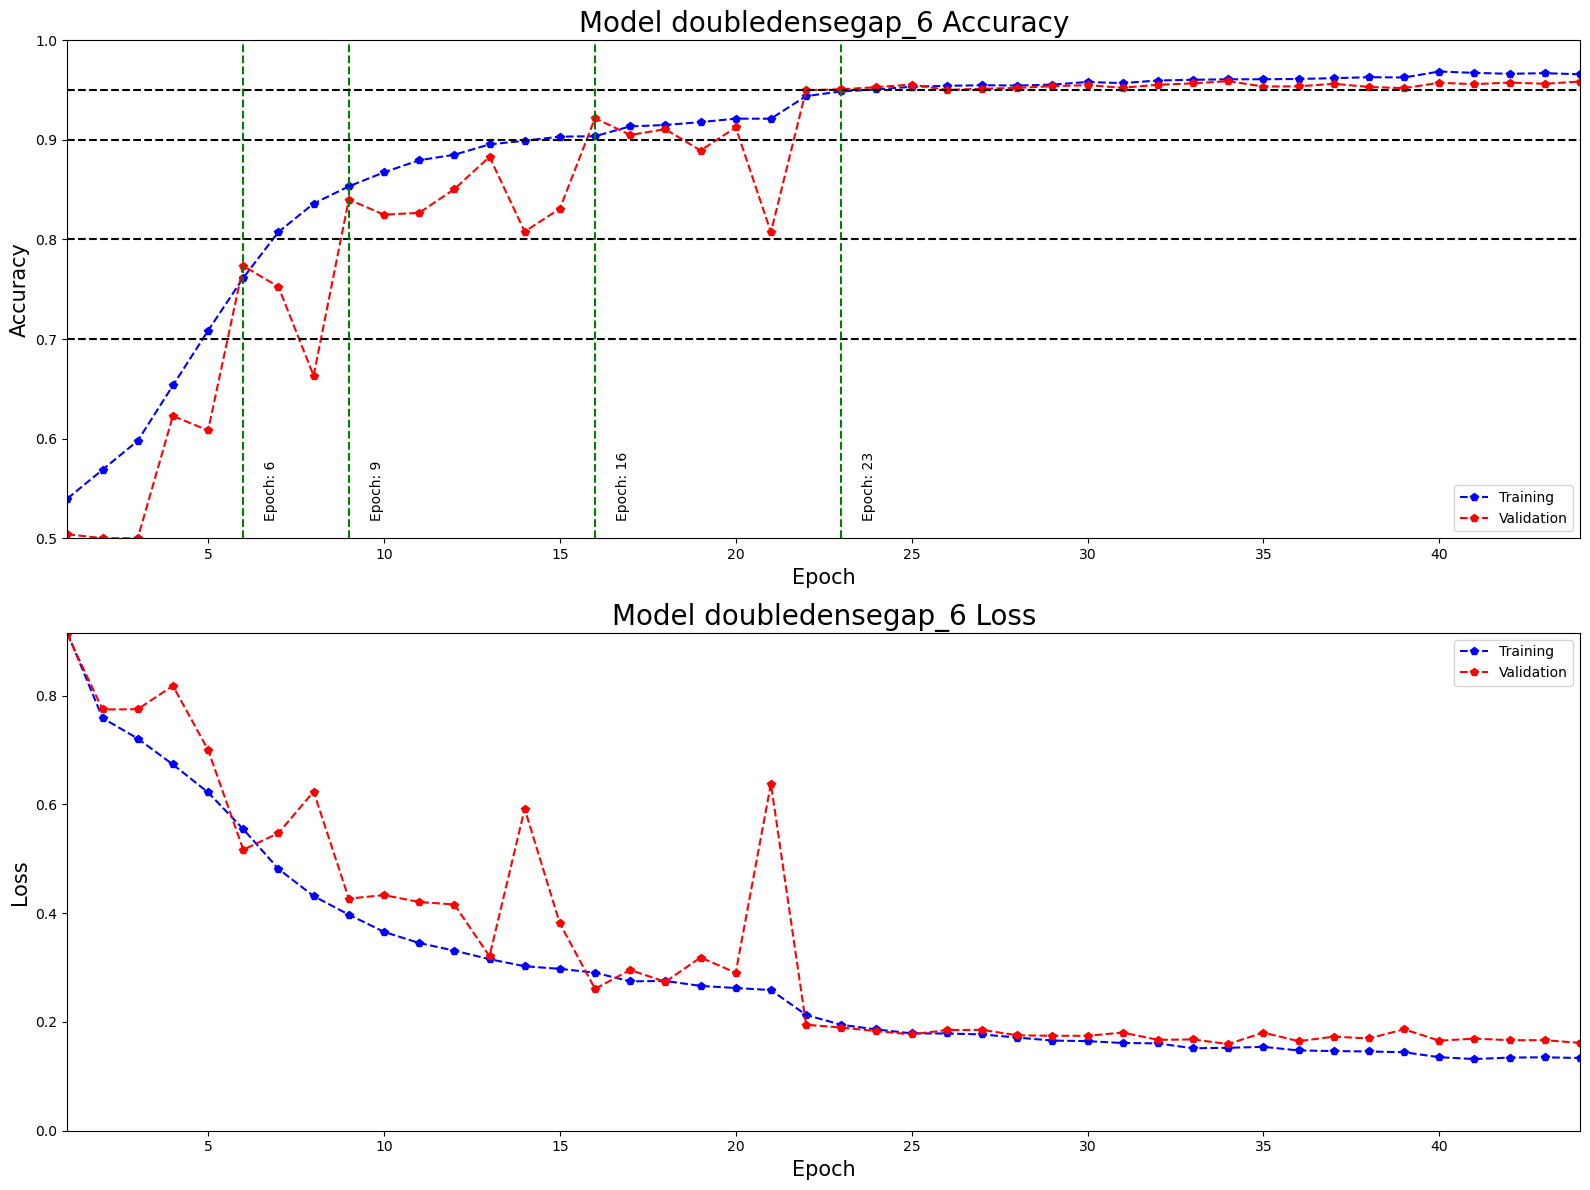

In [21]:
plot_individual_histories(models)

Wnioski: Wszystkie 3 finałowe modele zachowują się stabilnie, a kolejne modyfikacje pomogly utrzymać rezultat przy zminimalizowaniu strat (podwójne warstwy konwolucyjne i dense) oraz szybkości nauki (GlobalAvaragePooling)